In [1]:
import requests
import pandas as pd
from ichimoku import Ichimoku
import decimal
import datetime
from matplotlib.animation import FuncAnimation


In [2]:
eth_peices = requests.get('https://www.binance.com/api/v1/klines?symbol=ETHUSDT&interval=1m&limit=1000&startTime=1593662640001&endTime=1593689123000').json()

In [3]:
list_eth_peices = [{
        "Date": d[0],
        "Open": d[1],
        "High": d[2],
        "Low": d[3],
        "Close": d[4],
        "volume": d[5],
        "closeTime": d[6],
        "quoteVolume": d[7],
        "numTrades": d[8],
    } for d in eth_peices]

In [4]:
eth_peices_df = pd.DataFrame(list_eth_peices)
eth_peices_df.to_csv()
# eth_peices_df.set_index('Date')
# eth_peices_df['Date'] = eth_peices_df['Date'].astype('int64')
eth_peices_df['Date'] = eth_peices_df['Date'].apply(lambda x:int(x/1000))
# eth_peices_df['Date'] = eth_peices_df['Date'].apply(lambda x:datetime.datetime.utcfromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S'))
# datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
eth_peices_df[['Open','High','Low','Close']] = eth_peices_df[['Open','High','Low','Close']].astype('float64')
# eth_peices_df['Date'] = eth_peices_df['Date'].astype('int64')
# date_axis = [datetime.datetime.fromtimestamp(ts).strftime("%m/%d, %H:%M") for ts in eth_peices_df.tail(20)['Date'].values]
# date_axis

In [5]:
ichimoku_eth = Ichimoku(eth_peices_df)

In [6]:
ichimoku_eth.run()

,Date,Open,High,Low,Close,volume,closeTime,quoteVolume,numTrades,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,1593662700,231.14,231.15,231.13,231.14,19.29890000,1.593663e+12,4460.73948660,24.0,NaN,NaN,NaN,NaN,231.23
1,1593662760,231.15,231.20,231.14,231.19,32.22854000,1.593663e+12,7450.00070360,35.0,NaN,NaN,NaN,NaN,231.28
2,1593662820,231.19,231.20,231.10,231.14,348.49099000,1.593663e+12,80549.34930260,79.0,NaN,NaN,NaN,NaN,231.19
3,1593662880,231.14,231.21,231.13,231.21,127.14148000,1.593663e+12,29393.86288330,53.0,NaN,NaN,NaN,NaN,231.09
4,1593662940,231.20,231.28,231.17,231.26,45.11085000,1.593663e+12,10430.42326850,47.0,NaN,NaN,NaN,NaN,231.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593690180,1593690180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.2325,228.245,NaN
1593690240,1593690240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.2100,228.245,NaN
1593690300,1593690300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.2100,228.245,NaN
1593690360,1593690360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.2350,228.245,NaN


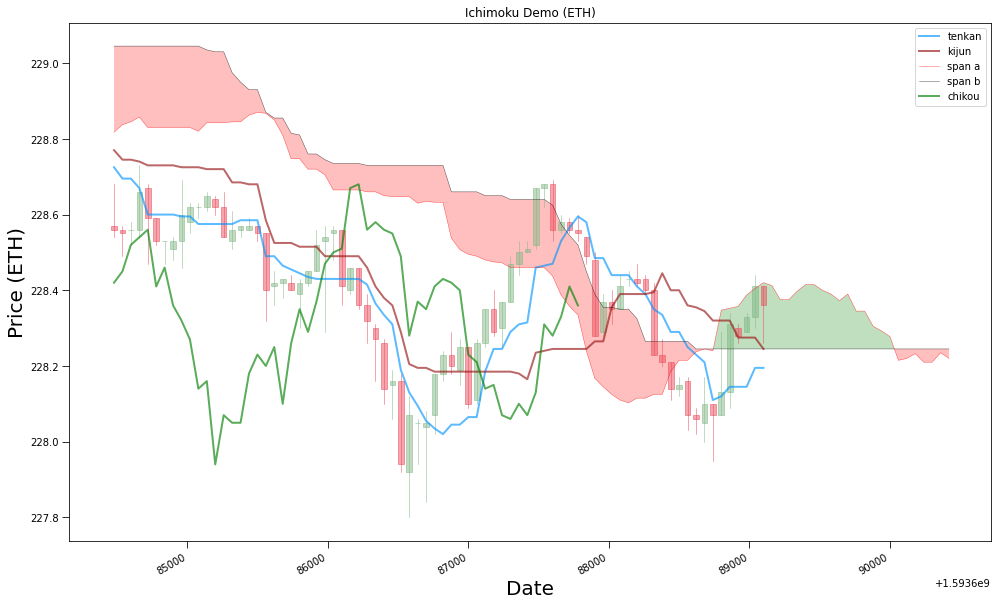

In [7]:
# %matplotlib notebook
ichimoku_eth.plot()

In [8]:
from websocket import create_connection

In [ ]:
from websocket import create_connection
import json

# Copy the web brower header and input as a dictionary
headers = json.dumps({
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-GB,en-US;q=0.9,en;q=0.8',
    'Cache-Control': 'no-cache',
    'Connection': 'Upgrade',
    'Host': 'streamer.cryptocompare.com',
    'Origin': 'https://www.cryptocompare.com',
    'Pragma': 'no-cache',
    'Sec-WebSocket-Extensions': 'permessage-deflate; client_max_window_bits',
    'Sec-WebSocket-Key': 'in6dCK/XY9j+9rWAeNRDXQ==',
    'Sec-WebSocket-Version': '13',
    'Upgrade': 'websocket',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'
})

# Launch the connection to the server.
ws = create_connection('wss://fstream.binance.com/stream',headers=headers)

# Perform the handshake.
ws.send(json.dumps({"method":"SUBSCRIBE","params":["ethusdt@kline_1m"],"id":2}))

# Printing all the result
while True:
    try:
        result = ws.recv()
        print(result)
    except Exception as e:
        print(e)
        break


{"result":null,"id":2}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690000883,"s":"ETHUSDT","k":{"t":1593690000000,"T":1593690059999,"s":"ETHUSDT","i":"1m","f":62903176,"L":62903180,"o":"227.67","c":"227.66","h":"227.67","l":"227.66","v":"12.407","n":5,"x":false,"q":"2824.70159","V":"0.001","Q":"0.22767","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690001683,"s":"ETHUSDT","k":{"t":1593690000000,"T":1593690059999,"s":"ETHUSDT","i":"1m","f":62903176,"L":62903197,"o":"227.67","c":"227.62","h":"227.67","l":"227.61","v":"47.960","n":22,"x":false,"q":"10917.79039","V":"12.001","Q":"2731.75305","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690003127,"s":"ETHUSDT","k":{"t":1593690000000,"T":1593690059999,"s":"ETHUSDT","i":"1m","f":62903176,"L":62903203,"o":"227.67","c":"227.61","h":"227.67","l":"227.61","v":"49.577","n":28,"x":false,"q":"11285.84546","V":"12.971","Q":"2952.54445","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690019970,"s":"ETHUSDT","k":{"t":1593690000000,"T":1593690059999,"s":"ETHUSDT","i":"1m","f":62903176,"L":62903364,"o":"227.67","c":"227.53","h":"227.67","l":"227.50","v":"1270.629","n":189,"x":false,"q":"289191.37530","V":"54.576","Q":"12421.62471","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690020348,"s":"ETHUSDT","k":{"t":1593690000000,"T":1593690059999,"s":"ETHUSDT","i":"1m","f":62903176,"L":62903367,"o":"227.67","c":"227.53","h":"227.67","l":"227.50","v":"1271.411","n":192,"x":false,"q":"289369.29599","V":"54.581","Q":"12422.76236","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690024473,"s":"ETHUSDT","k":{"t":1593690000000,"T":1593690059999,"s":"ETHUSDT","i":"1m","f":62903176,"L":62903370,"o":"227.67","c":"227.54","h":"227.67","l":"227.50","v":"1271.444","n":195,"x":false,"q":"289376.80476","V":"54.614","Q":"12430.27113","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690060421,"s":"ETHUSDT","k":{"t":1593690000000,"T":1593690059999,"s":"ETHUSDT","i":"1m","f":62903176,"L":62903476,"o":"227.67","c":"227.56","h":"227.67","l":"227.50","v":"1737.944","n":301,"x":true,"q":"395526.59207","V":"365.813","Q":"83243.40470","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690061183,"s":"ETHUSDT","k":{"t":1593690060000,"T":1593690119999,"s":"ETHUSDT","i":"1m","f":62903477,"L":62903478,"o":"227.57","c":"227.56","h":"227.57","l":"227.56","v":"1.801","n":2,"x":false,"q":"409.83557","V":"0.001","Q":"0.22757","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690062208,"s":"ETHUSDT","k":{"t":1593690060000,"T":1593690119999,"s":"ETHUSDT","i":"1m","f":62903477,"L":62903480,"o":"227.57","c":"227.56","h":"227.57","l":"227.56","v":"4.198","n":4,"x":false,"q":"955.29689","V":"0.001","Q":"0.22757","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690063890,"s":"ETH

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690098827,"s":"ETHUSDT","k":{"t":1593690060000,"T":1593690119999,"s":"ETHUSDT","i":"1m","f":62903477,"L":62903696,"o":"227.57","c":"227.72","h":"227.72","l":"227.55","v":"664.934","n":220,"x":false,"q":"151368.09778","V":"302.834","Q":"68943.11286","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690099081,"s":"ETHUSDT","k":{"t":1593690060000,"T":1593690119999,"s":"ETHUSDT","i":"1m","f":62903477,"L":62903701,"o":"227.57","c":"227.72","h":"227.72","l":"227.55","v":"671.417","n":225,"x":false,"q":"152844.40654","V":"308.733","Q":"70286.43314","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690099472,"s":"ETHUSDT","k":{"t":1593690060000,"T":1593690119999,"s":"ETHUSDT","i":"1m","f":62903477,"L":62903702,"o":"227.57","c":"227.73","h":"227.73","l":"227.55","v":"671.427","n":226,"x":false,"q":"152846.68384","V":"308.743","Q":"70288.71044","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690135624,"s":"ETHUSDT","k":{"t":1593690120000,"T":1593690179999,"s":"ETHUSDT","i":"1m","f":62903739,"L":62903837,"o":"227.68","c":"227.61","h":"227.72","l":"227.60","v":"470.983","n":99,"x":false,"q":"107220.59865","V":"134.924","Q":"30723.30123","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690136138,"s":"ETHUSDT","k":{"t":1593690120000,"T":1593690179999,"s":"ETHUSDT","i":"1m","f":62903739,"L":62903845,"o":"227.68","c":"227.62","h":"227.72","l":"227.60","v":"476.699","n":107,"x":false,"q":"108521.62245","V":"140.640","Q":"32024.32503","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690136501,"s":"ETHUSDT","k":{"t":1593690120000,"T":1593690179999,"s":"ETHUSDT","i":"1m","f":62903739,"L":62903849,"o":"227.68","c":"227.64","h":"227.72","l":"227.60","v":"489.187","n":111,"x":false,"q":"111364.15867","V":"153.128","Q":"34866.86125","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690175378,"s":"ETHUSDT","k":{"t":1593690120000,"T":1593690179999,"s":"ETHUSDT","i":"1m","f":62903739,"L":62903944,"o":"227.68","c":"227.63","h":"227.72","l":"227.59","v":"653.033","n":206,"x":false,"q":"148658.74126","V":"285.138","Q":"64915.30254","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690175965,"s":"ETHUSDT","k":{"t":1593690120000,"T":1593690179999,"s":"ETHUSDT","i":"1m","f":62903739,"L":62903954,"o":"227.68","c":"227.65","h":"227.72","l":"227.59","v":"661.336","n":216,"x":false,"q":"150548.86891","V":"293.441","Q":"66805.43019","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690176261,"s":"ETHUSDT","k":{"t":1593690120000,"T":1593690179999,"s":"ETHUSDT","i":"1m","f":62903739,"L":62903969,"o":"227.68","c":"227.63","h":"227.72","l":"227.59","v":"678.510","n":231,"x":false,"q":"154458.45582","V":"299.141","Q":"68103.05129","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690227291,"s":"ETHUSDT","k":{"t":1593690180000,"T":1593690239999,"s":"ETHUSDT","i":"1m","f":62903991,"L":62904075,"o":"227.58","c":"227.60","h":"227.65","l":"227.58","v":"158.877","n":85,"x":false,"q":"36166.19106","V":"151.207","Q":"34420.43471","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690227561,"s":"ETHUSDT","k":{"t":1593690180000,"T":1593690239999,"s":"ETHUSDT","i":"1m","f":62903991,"L":62904143,"o":"227.58","c":"227.50","h":"227.65","l":"227.50","v":"500.303","n":153,"x":false,"q":"113867.25887","V":"151.207","Q":"34420.43471","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690228507,"s":"ETHUSDT","k":{"t":1593690180000,"T":1593690239999,"s":"ETHUSDT","i":"1m","f":62903991,"L":62904204,"o":"227.58","c":"227.41","h":"227.65","l":"227.41","v":"617.784","n":214,"x":false,"q":"140592.10958","V":"151.207","Q":"34420.43471","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690279520,"s":"ETHUSDT","k":{"t":1593690240000,"T":1593690299999,"s":"ETHUSDT","i":"1m","f":62904244,"L":62904295,"o":"227.46","c":"227.49","h":"227.51","l":"227.46","v":"55.234","n":52,"x":false,"q":"12565.49877","V":"34.808","Q":"7918.89716","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690280365,"s":"ETHUSDT","k":{"t":1593690240000,"T":1593690299999,"s":"ETHUSDT","i":"1m","f":62904244,"L":62904300,"o":"227.46","c":"227.50","h":"227.51","l":"227.46","v":"56.581","n":57,"x":false,"q":"12871.92790","V":"34.818","Q":"7921.17216","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690283056,"s":"ETHUSDT","k":{"t":1593690240000,"T":1593690299999,"s":"ETHUSDT","i":"1m","f":62904244,"L":62904302,"o":"227.46","c":"227.49","h":"227.51","l":"227.46","v":"68.282","n":59,"x":false,"q":"15533.78920","V":"34.899","Q":"7939.59966","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936902872

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690309347,"s":"ETHUSDT","k":{"t":1593690300000,"T":1593690359999,"s":"ETHUSDT","i":"1m","f":62904420,"L":62904481,"o":"227.65","c":"227.69","h":"227.70","l":"227.64","v":"110.947","n":62,"x":false,"q":"25261.62482","V":"71.598","Q":"16302.46684","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690310385,"s":"ETHUSDT","k":{"t":1593690300000,"T":1593690359999,"s":"ETHUSDT","i":"1m","f":62904420,"L":62904491,"o":"227.65","c":"227.65","h":"227.70","l":"227.64","v":"141.414","n":72,"x":false,"q":"32198.32142","V":"71.599","Q":"16302.69449","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690312433,"s":"ETHUSDT","k":{"t":1593690300000,"T":1593690359999,"s":"ETHUSDT","i":"1m","f":62904420,"L":62904493,"o":"227.65","c":"227.64","h":"227.70","l":"227.64","v":"141.424","n":74,"x":false,"q":"32200.59788","V":"71.605","Q":"16304.06039","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690358497,"s":"ETHUSDT","k":{"t":1593690300000,"T":1593690359999,"s":"ETHUSDT","i":"1m","f":62904420,"L":62904604,"o":"227.65","c":"227.60","h":"227.70","l":"227.60","v":"298.880","n":185,"x":false,"q":"68040.88984","V":"97.051","Q":"22096.47765","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690360465,"s":"ETHUSDT","k":{"t":1593690300000,"T":1593690359999,"s":"ETHUSDT","i":"1m","f":62904420,"L":62904612,"o":"227.65","c":"227.59","h":"227.70","l":"227.59","v":"308.885","n":193,"x":true,"q":"70317.99361","V":"97.051","Q":"22096.47765","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690361425,"s":"ETHUSDT","k":{"t":1593690360000,"T":1593690419999,"s":"ETHUSDT","i":"1m","f":62904613,"L":62904614,"o":"227.60","c":"227.60","h":"227.60","l":"227.60","v":"0.026","n":2,"x":false,"q":"5.91760","V":"0.000","Q":"0.00000","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690364873,"s

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690421600,"s":"ETHUSDT","k":{"t":1593690420000,"T":1593690479999,"s":"ETHUSDT","i":"1m","f":62904698,"L":62904699,"o":"227.70","c":"227.70","h":"227.70","l":"227.70","v":"26.352","n":2,"x":false,"q":"6000.35040","V":"26.352","Q":"6000.35040","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690421901,"s":"ETHUSDT","k":{"t":1593690420000,"T":1593690479999,"s":"ETHUSDT","i":"1m","f":62904698,"L":62904700,"o":"227.70","c":"227.69","h":"227.70","l":"227.69","v":"26.362","n":3,"x":false,"q":"6002.62730","V":"26.352","Q":"6000.35040","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690425006,"s":"ETHUSDT","k":{"t":1593690420000,"T":1593690479999,"s":"ETHUSDT","i":"1m","f":62904698,"L":62904702,"o":"227.70","c":"227.69","h":"227.70","l":"227.69","v":"26.379","n":5,"x":false,"q":"6006.49803","V":"26.352","Q":"6000.35040","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690425330,"s"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690467425,"s":"ETHUSDT","k":{"t":1593690420000,"T":1593690479999,"s":"ETHUSDT","i":"1m","f":62904698,"L":62904897,"o":"227.70","c":"227.84","h":"227.85","l":"227.66","v":"317.505","n":200,"x":false,"q":"72306.66880","V":"275.363","Q":"62711.35421","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690467846,"s":"ETHUSDT","k":{"t":1593690420000,"T":1593690479999,"s":"ETHUSDT","i":"1m","f":62904698,"L":62904898,"o":"227.70","c":"227.85","h":"227.85","l":"227.66","v":"317.605","n":201,"x":false,"q":"72329.45380","V":"275.463","Q":"62734.13921","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690468138,"s":"ETHUSDT","k":{"t":1593690420000,"T":1593690479999,"s":"ETHUSDT","i":"1m","f":62904698,"L":62904925,"o":"227.70","c":"227.89","h":"227.89","l":"227.66","v":"344.309","n":228,"x":false,"q":"78414.52316","V":"299.837","Q":"68288.24817","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690484888,"s":"ETHUSDT","k":{"t":1593690480000,"T":1593690539999,"s":"ETHUSDT","i":"1m","f":62905114,"L":62905173,"o":"227.95","c":"227.95","h":"228.00","l":"227.92","v":"51.892","n":60,"x":false,"q":"11829.47526","V":"31.340","Q":"7144.43308","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690485163,"s":"ETHUSDT","k":{"t":1593690480000,"T":1593690539999,"s":"ETHUSDT","i":"1m","f":62905114,"L":62905176,"o":"227.95","c":"227.95","h":"228.00","l":"227.92","v":"52.164","n":63,"x":false,"q":"11891.47766","V":"31.340","Q":"7144.43308","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690485443,"s":"ETHUSDT","k":{"t":1593690480000,"T":1593690539999,"s":"ETHUSDT","i":"1m","f":62905114,"L":62905178,"o":"227.95","c":"227.96","h":"228.00","l":"227.92","v":"52.178","n":65,"x":false,"q":"11894.66906","V":"31.350","Q":"7146.71268","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936904858

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690516534,"s":"ETHUSDT","k":{"t":1593690480000,"T":1593690539999,"s":"ETHUSDT","i":"1m","f":62905114,"L":62905282,"o":"227.95","c":"227.86","h":"228.01","l":"227.84","v":"400.238","n":169,"x":false,"q":"91231.20945","V":"101.791","Q":"23203.36909","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690516784,"s":"ETHUSDT","k":{"t":1593690480000,"T":1593690539999,"s":"ETHUSDT","i":"1m","f":62905114,"L":62905283,"o":"227.95","c":"227.86","h":"228.01","l":"227.84","v":"400.290","n":170,"x":false,"q":"91243.05817","V":"101.791","Q":"23203.36909","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690518598,"s":"ETHUSDT","k":{"t":1593690480000,"T":1593690539999,"s":"ETHUSDT","i":"1m","f":62905114,"L":62905284,"o":"227.95","c":"227.86","h":"228.01","l":"227.84","v":"400.346","n":171,"x":false,"q":"91255.81833","V":"101.791","Q":"23203.36909","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690551244,"s":"ETHUSDT","k":{"t":1593690540000,"T":1593690599999,"s":"ETHUSDT","i":"1m","f":62905306,"L":62905406,"o":"227.91","c":"228.00","h":"228.00","l":"227.88","v":"312.179","n":101,"x":false,"q":"71165.55490","V":"284.994","Q":"64968.39979","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690551515,"s":"ETHUSDT","k":{"t":1593690540000,"T":1593690599999,"s":"ETHUSDT","i":"1m","f":62905306,"L":62905410,"o":"227.91","c":"228.00","h":"228.00","l":"227.88","v":"314.279","n":105,"x":false,"q":"71644.35390","V":"286.994","Q":"65424.39979","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690551903,"s":"ETHUSDT","k":{"t":1593690540000,"T":1593690599999,"s":"ETHUSDT","i":"1m","f":62905306,"L":62905411,"o":"227.91","c":"227.99","h":"228.00","l":"227.88","v":"318.279","n":106,"x":false,"q":"72556.31390","V":"286.994","Q":"65424.39979","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690589645,"s":"ETHUSDT","k":{"t":1593690540000,"T":1593690599999,"s":"ETHUSDT","i":"1m","f":62905306,"L":62905528,"o":"227.91","c":"227.86","h":"228.01","l":"227.86","v":"765.444","n":223,"x":false,"q":"174496.13913","V":"330.648","Q":"75377.52207","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690590362,"s":"ETHUSDT","k":{"t":1593690540000,"T":1593690599999,"s":"ETHUSDT","i":"1m","f":62905306,"L":62905551,"o":"227.91","c":"227.81","h":"228.01","l":"227.80","v":"800.124","n":246,"x":false,"q":"182397.12691","V":"330.666","Q":"75381.62265","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690595415,"s":"ETHUSDT","k":{"t":1593690540000,"T":1593690599999,"s":"ETHUSDT","i":"1m","f":62905306,"L":62905553,"o":"227.91","c":"227.81","h":"228.01","l":"227.80","v":"800.138","n":248,"x":false,"q":"182400.31625","V":"330.680","Q":"75384.81199","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690655431,"s":"ETHUSDT","k":{"t":1593690600000,"T":1593690659999,"s":"ETHUSDT","i":"1m","f":62905558,"L":62905669,"o":"227.84","c":"227.90","h":"227.90","l":"227.83","v":"193.730","n":112,"x":false,"q":"44145.66630","V":"156.395","Q":"35637.80858","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690659786,"s":"ETHUSDT","k":{"t":1593690600000,"T":1593690659999,"s":"ETHUSDT","i":"1m","f":62905558,"L":62905671,"o":"227.84","c":"227.89","h":"227.90","l":"227.83","v":"193.742","n":114,"x":false,"q":"44148.40100","V":"156.397","Q":"35638.26438","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690660498,"s":"ETHUSDT","k":{"t":1593690600000,"T":1593690659999,"s":"ETHUSDT","i":"1m","f":62905558,"L":62905672,"o":"227.84","c":"227.89","h":"227.90","l":"227.83","v":"194.132","n":115,"x":true,"q":"44237.27810","V":"156.397","Q":"35638.26438","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690711209,"s":"ETHUSDT","k":{"t":1593690660000,"T":1593690719999,"s":"ETHUSDT","i":"1m","f":62905673,"L":62905750,"o":"227.90","c":"227.89","h":"227.90","l":"227.83","v":"93.245","n":78,"x":false,"q":"21245.40424","V":"15.263","Q":"3477.98911","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690714174,"s":"ETHUSDT","k":{"t":1593690660000,"T":1593690719999,"s":"ETHUSDT","i":"1m","f":62905673,"L":62905753,"o":"227.90","c":"227.90","h":"227.90","l":"227.83","v":"94.182","n":81,"x":false,"q":"21458.93760","V":"15.306","Q":"3487.78881","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690715052,"s":"ETHUSDT","k":{"t":1593690660000,"T":1593690719999,"s":"ETHUSDT","i":"1m","f":62905673,"L":62905755,"o":"227.90","c":"227.91","h":"227.91","l":"227.83","v":"95.087","n":83,"x":false,"q":"21665.19615","V":"16.211","Q":"3694.04736","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936907153

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690785025,"s":"ETHUSDT","k":{"t":1593690780000,"T":1593690839999,"s":"ETHUSDT","i":"1m","f":62905831,"L":62905851,"o":"227.95","c":"227.92","h":"227.95","l":"227.92","v":"22.722","n":21,"x":false,"q":"5179.02669","V":"0.001","Q":"0.22795","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690785372,"s":"ETHUSDT","k":{"t":1593690780000,"T":1593690839999,"s":"ETHUSDT","i":"1m","f":62905831,"L":62905852,"o":"227.95","c":"227.93","h":"227.95","l":"227.92","v":"22.723","n":22,"x":false,"q":"5179.25462","V":"0.002","Q":"0.45588","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690788237,"s":"ETHUSDT","k":{"t":1593690780000,"T":1593690839999,"s":"ETHUSDT","i":"1m","f":62905831,"L":62905854,"o":"227.95","c":"227.93","h":"227.95","l":"227.92","v":"22.732","n":24,"x":false,"q":"5181.30599","V":"0.011","Q":"2.50725","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690790395,"s":"ETHUSDT

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690809760,"s":"ETHUSDT","k":{"t":1593690780000,"T":1593690839999,"s":"ETHUSDT","i":"1m","f":62905831,"L":62906075,"o":"227.95","c":"228.03","h":"228.13","l":"227.92","v":"452.634","n":245,"x":false,"q":"103220.38982","V":"339.896","Q":"77511.79721","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690813140,"s":"ETHUSDT","k":{"t":1593690780000,"T":1593690839999,"s":"ETHUSDT","i":"1m","f":62905831,"L":62906077,"o":"227.95","c":"228.03","h":"228.13","l":"227.92","v":"452.648","n":247,"x":false,"q":"103223.58224","V":"339.900","Q":"77512.70933","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690813774,"s":"ETHUSDT","k":{"t":1593690780000,"T":1593690839999,"s":"ETHUSDT","i":"1m","f":62905831,"L":62906086,"o":"227.95","c":"228.03","h":"228.13","l":"227.92","v":"462.654","n":256,"x":false,"q":"105505.41460","V":"349.906","Q":"79794.54169","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690845156,"s":"ETHUSDT","k":{"t":1593690840000,"T":1593690899999,"s":"ETHUSDT","i":"1m","f":62906143,"L":62906187,"o":"228.00","c":"228.03","h":"228.07","l":"228.00","v":"175.279","n":45,"x":false,"q":"39974.05006","V":"163.987","Q":"37399.26666","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690848017,"s":"ETHUSDT","k":{"t":1593690840000,"T":1593690899999,"s":"ETHUSDT","i":"1m","f":62906143,"L":62906190,"o":"228.00","c":"228.03","h":"228.07","l":"228.00","v":"175.296","n":48,"x":false,"q":"39977.92664","V":"163.994","Q":"37400.86294","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690848662,"s":"ETHUSDT","k":{"t":1593690840000,"T":1593690899999,"s":"ETHUSDT","i":"1m","f":62906143,"L":62906192,"o":"228.00","c":"228.04","h":"228.07","l":"228.00","v":"175.496","n":50,"x":false,"q":"40023.53274","V":"164.004","Q":"37403.14334","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690897676,"s":"ETHUSDT","k":{"t":1593690840000,"T":1593690899999,"s":"ETHUSDT","i":"1m","f":62906143,"L":62906274,"o":"228.00","c":"228.13","h":"228.15","l":"228.00","v":"290.977","n":132,"x":false,"q":"66364.21893","V":"268.002","Q":"61124.44305","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690898113,"s":"ETHUSDT","k":{"t":1593690840000,"T":1593690899999,"s":"ETHUSDT","i":"1m","f":62906143,"L":62906297,"o":"228.00","c":"228.15","h":"228.15","l":"228.00","v":"379.437","n":155,"x":false,"q":"86545.94869","V":"356.462","Q":"81306.17281","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690899391,"s":"ETHUSDT","k":{"t":1593690840000,"T":1593690899999,"s":"ETHUSDT","i":"1m","f":62906143,"L":62906298,"o":"228.00","c":"228.14","h":"228.15","l":"228.00","v":"379.447","n":156,"x":false,"q":"86548.23009","V":"356.462","Q":"81306.17281","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690936655,"s":"ETHUSDT","k":{"t":1593690900000,"T":1593690959999,"s":"ETHUSDT","i":"1m","f":62906302,"L":62906382,"o":"228.13","c":"228.07","h":"228.14","l":"228.06","v":"139.555","n":81,"x":false,"q":"31831.12107","V":"20.404","Q":"4654.18526","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690937059,"s":"ETHUSDT","k":{"t":1593690900000,"T":1593690959999,"s":"ETHUSDT","i":"1m","f":62906302,"L":62906389,"o":"228.13","c":"228.06","h":"228.14","l":"228.06","v":"140.407","n":88,"x":false,"q":"32025.43477","V":"21.062","Q":"4804.25532","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593690938148,"s":"ETHUSDT","k":{"t":1593690900000,"T":1593690959999,"s":"ETHUSDT","i":"1m","f":62906302,"L":62906390,"o":"228.13","c":"228.06","h":"228.14","l":"228.06","v":"170.938","n":89,"x":false,"q":"38988.33463","V":"21.062","Q":"4804.25532","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936909

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691011327,"s":"ETHUSDT","k":{"t":1593690960000,"T":1593691019999,"s":"ETHUSDT","i":"1m","f":62906414,"L":62906563,"o":"228.10","c":"227.95","h":"228.10","l":"227.94","v":"524.893","n":150,"x":false,"q":"119686.60253","V":"99.678","Q":"22724.95984","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691015381,"s":"ETHUSDT","k":{"t":1593690960000,"T":1593691019999,"s":"ETHUSDT","i":"1m","f":62906414,"L":62906566,"o":"228.10","c":"227.97","h":"228.10","l":"227.94","v":"526.517","n":153,"x":false,"q":"120056.80958","V":"101.302","Q":"23095.16689","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691017883,"s":"ETHUSDT","k":{"t":1593690960000,"T":1593691019999,"s":"ETHUSDT","i":"1m","f":62906414,"L":62906568,"o":"228.10","c":"227.96","h":"228.10","l":"227.94","v":"526.529","n":155,"x":false,"q":"120059.54512","V":"101.304","Q":"23095.62283","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691070354,"s":"ETHUSDT","k":{"t":1593691020000,"T":1593691079999,"s":"ETHUSDT","i":"1m","f":62906582,"L":62906656,"o":"227.96","c":"227.96","h":"228.00","l":"227.94","v":"55.791","n":75,"x":false,"q":"12718.60399","V":"17.264","Q":"3935.62079","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691073475,"s":"ETHUSDT","k":{"t":1593691020000,"T":1593691079999,"s":"ETHUSDT","i":"1m","f":62906582,"L":62906658,"o":"227.96","c":"227.97","h":"228.00","l":"227.94","v":"55.819","n":77,"x":false,"q":"12724.98707","V":"17.284","Q":"3940.18019","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691075397,"s":"ETHUSDT","k":{"t":1593691020000,"T":1593691079999,"s":"ETHUSDT","i":"1m","f":62906582,"L":62906659,"o":"227.96","c":"227.96","h":"228.00","l":"227.94","v":"55.821","n":78,"x":false,"q":"12725.44299","V":"17.284","Q":"3940.18019","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936910804

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691140437,"s":"ETHUSDT","k":{"t":1593691080000,"T":1593691139999,"s":"ETHUSDT","i":"1m","f":62906661,"L":62906753,"o":"227.97","c":"228.14","h":"228.14","l":"227.96","v":"131.590","n":93,"x":true,"q":"30009.42412","V":"90.119","Q":"20550.56912","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691145013,"s":"ETHUSDT","k":{"t":1593691140000,"T":1593691199999,"s":"ETHUSDT","i":"1m","f":62906754,"L":62906755,"o":"228.13","c":"228.13","h":"228.13","l":"228.13","v":"0.010","n":2,"x":false,"q":"2.28130","V":"0.010","Q":"2.28130","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691145370,"s":"ETHUSDT","k":{"t":1593691140000,"T":1593691199999,"s":"ETHUSDT","i":"1m","f":62906754,"L":62906815,"o":"228.13","c":"228.15","h":"228.19","l":"228.13","v":"98.212","n":62,"x":false,"q":"22410.36704","V":"98.038","Q":"22370.67236","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691146272,"s":"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691183148,"s":"ETHUSDT","k":{"t":1593691140000,"T":1593691199999,"s":"ETHUSDT","i":"1m","f":62906754,"L":62906908,"o":"228.13","c":"228.20","h":"228.20","l":"228.13","v":"458.731","n":155,"x":false,"q":"104675.91237","V":"345.651","Q":"78874.45090","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691186132,"s":"ETHUSDT","k":{"t":1593691140000,"T":1593691199999,"s":"ETHUSDT","i":"1m","f":62906754,"L":62906909,"o":"228.13","c":"228.20","h":"228.20","l":"228.13","v":"458.732","n":156,"x":false,"q":"104676.14057","V":"345.652","Q":"78874.67910","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691187934,"s":"ETHUSDT","k":{"t":1593691140000,"T":1593691199999,"s":"ETHUSDT","i":"1m","f":62906754,"L":62906910,"o":"228.13","c":"228.19","h":"228.20","l":"228.13","v":"458.742","n":157,"x":false,"q":"104678.42247","V":"345.652","Q":"78874.67910","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691211550,"s":"ETHUSDT","k":{"t":1593691200000,"T":1593691259999,"s":"ETHUSDT","i":"1m","f":62906933,"L":62907083,"o":"228.12","c":"227.92","h":"228.12","l":"227.92","v":"320.402","n":151,"x":false,"q":"73054.19150","V":"121.762","Q":"27756.86169","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691212191,"s":"ETHUSDT","k":{"t":1593691200000,"T":1593691259999,"s":"ETHUSDT","i":"1m","f":62906933,"L":62907100,"o":"228.12","c":"227.90","h":"228.12","l":"227.90","v":"355.155","n":168,"x":false,"q":"80974.58022","V":"121.762","Q":"27756.86169","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691212493,"s":"ETHUSDT","k":{"t":1593691200000,"T":1593691259999,"s":"ETHUSDT","i":"1m","f":62906933,"L":62907101,"o":"228.12","c":"227.90","h":"228.12","l":"227.90","v":"359.238","n":169,"x":false,"q":"81905.09592","V":"121.762","Q":"27756.86169","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691232835,"s":"ETHUSDT","k":{"t":1593691200000,"T":1593691259999,"s":"ETHUSDT","i":"1m","f":62906933,"L":62907270,"o":"228.12","c":"227.81","h":"228.12","l":"227.76","v":"807.413","n":338,"x":false,"q":"184008.32047","V":"242.200","Q":"55194.41402","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691233818,"s":"ETHUSDT","k":{"t":1593691200000,"T":1593691259999,"s":"ETHUSDT","i":"1m","f":62906933,"L":62907272,"o":"228.12","c":"227.82","h":"228.12","l":"227.76","v":"813.756","n":340,"x":false,"q":"185453.37930","V":"248.543","Q":"56639.47285","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691235085,"s":"ETHUSDT","k":{"t":1593691200000,"T":1593691259999,"s":"ETHUSDT","i":"1m","f":62906933,"L":62907279,"o":"228.12","c":"227.81","h":"228.12","l":"227.76","v":"817.766","n":347,"x":false,"q":"186366.96658","V":"252.543","Q":"57550.78203","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691262524,"s":"ETHUSDT","k":{"t":1593691260000,"T":1593691319999,"s":"ETHUSDT","i":"1m","f":62907455,"L":62907457,"o":"227.77","c":"227.76","h":"227.77","l":"227.76","v":"0.020","n":3,"x":false,"q":"4.55530","V":"0.010","Q":"2.27770","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691264165,"s":"ETHUSDT","k":{"t":1593691260000,"T":1593691319999,"s":"ETHUSDT","i":"1m","f":62907455,"L":62907468,"o":"227.77","c":"227.77","h":"227.77","l":"227.74","v":"4.780","n":14,"x":false,"q":"1088.66473","V":"3.215","Q":"732.24865","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691265039,"s":"ETHUSDT","k":{"t":1593691260000,"T":1593691319999,"s":"ETHUSDT","i":"1m","f":62907455,"L":62907474,"o":"227.77","c":"227.77","h":"227.80","l":"227.74","v":"11.773","n":20,"x":false,"q":"2681.60929","V":"8.200","Q":"1867.83105","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691265781,"s":"ETHUSDT"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691286170,"s":"ETHUSDT","k":{"t":1593691260000,"T":1593691319999,"s":"ETHUSDT","i":"1m","f":62907455,"L":62907684,"o":"227.77","c":"228.02","h":"228.03","l":"227.71","v":"668.642","n":230,"x":false,"q":"152364.23015","V":"571.482","Q":"130230.34055","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691286420,"s":"ETHUSDT","k":{"t":1593691260000,"T":1593691319999,"s":"ETHUSDT","i":"1m","f":62907455,"L":62907696,"o":"227.77","c":"228.02","h":"228.03","l":"227.71","v":"688.644","n":242,"x":false,"q":"156925.02637","V":"571.482","Q":"130230.34055","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691287016,"s":"ETHUSDT","k":{"t":1593691260000,"T":1593691319999,"s":"ETHUSDT","i":"1m","f":62907455,"L":62907712,"o":"227.77","c":"227.97","h":"228.03","l":"227.71","v":"705.295","n":258,"x":false,"q":"160721.32240","V":"571.482","Q":"130230.34055","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691333121,"s":"ETHUSDT","k":{"t":1593691320000,"T":1593691379999,"s":"ETHUSDT","i":"1m","f":62907807,"L":62907833,"o":"228.01","c":"227.99","h":"228.01","l":"227.98","v":"30.966","n":27,"x":false,"q":"7059.75245","V":"0.205","Q":"46.73987","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691335596,"s":"ETHUSDT","k":{"t":1593691320000,"T":1593691379999,"s":"ETHUSDT","i":"1m","f":62907807,"L":62907837,"o":"228.01","c":"227.99","h":"228.01","l":"227.98","v":"32.630","n":31,"x":false,"q":"7439.12781","V":"0.205","Q":"46.73987","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691335910,"s":"ETHUSDT","k":{"t":1593691320000,"T":1593691379999,"s":"ETHUSDT","i":"1m","f":62907807,"L":62907838,"o":"228.01","c":"227.99","h":"228.01","l":"227.98","v":"32.639","n":32,"x":false,"q":"7441.17972","V":"0.205","Q":"46.73987","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691340335,"s":"ETHU

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691380885,"s":"ETHUSDT","k":{"t":1593691380000,"T":1593691439999,"s":"ETHUSDT","i":"1m","f":62907958,"L":62907959,"o":"227.94","c":"227.93","h":"227.94","l":"227.93","v":"0.015","n":2,"x":false,"q":"3.41896","V":"0.001","Q":"0.22794","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691381335,"s":"ETHUSDT","k":{"t":1593691380000,"T":1593691439999,"s":"ETHUSDT","i":"1m","f":62907958,"L":62907966,"o":"227.94","c":"227.93","h":"227.94","l":"227.92","v":"1.002","n":9,"x":false,"q":"228.37646","V":"0.002","Q":"0.45587","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691383005,"s":"ETHUSDT","k":{"t":1593691380000,"T":1593691439999,"s":"ETHUSDT","i":"1m","f":62907958,"L":62907967,"o":"227.94","c":"227.93","h":"227.94","l":"227.92","v":"14.041","n":10,"x":false,"q":"3200.35573","V":"13.041","Q":"2972.43514","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691383656,"s":"ETHUSDT","k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691427293,"s":"ETHUSDT","k":{"t":1593691380000,"T":1593691439999,"s":"ETHUSDT","i":"1m","f":62907958,"L":62908142,"o":"227.94","c":"227.84","h":"228.00","l":"227.84","v":"367.573","n":185,"x":false,"q":"83782.02725","V":"175.709","Q":"40055.74707","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691428718,"s":"ETHUSDT","k":{"t":1593691380000,"T":1593691439999,"s":"ETHUSDT","i":"1m","f":62907958,"L":62908146,"o":"227.94","c":"227.84","h":"228.00","l":"227.84","v":"369.172","n":189,"x":false,"q":"84146.34341","V":"175.709","Q":"40055.74707","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691429750,"s":"ETHUSDT","k":{"t":1593691380000,"T":1593691439999,"s":"ETHUSDT","i":"1m","f":62907958,"L":62908149,"o":"227.94","c":"227.84","h":"228.00","l":"227.84","v":"369.950","n":192,"x":false,"q":"84323.60293","V":"175.709","Q":"40055.74707","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691475056,"s":"ETHUSDT","k":{"t":1593691440000,"T":1593691499999,"s":"ETHUSDT","i":"1m","f":62908170,"L":62908292,"o":"227.83","c":"227.94","h":"227.98","l":"227.82","v":"332.581","n":123,"x":false,"q":"75791.62793","V":"267.440","Q":"60946.82538","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691475322,"s":"ETHUSDT","k":{"t":1593691440000,"T":1593691499999,"s":"ETHUSDT","i":"1m","f":62908170,"L":62908295,"o":"227.83","c":"227.93","h":"227.98","l":"227.82","v":"332.593","n":126,"x":false,"q":"75794.36311","V":"267.440","Q":"60946.82538","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691480369,"s":"ETHUSDT","k":{"t":1593691440000,"T":1593691499999,"s":"ETHUSDT","i":"1m","f":62908170,"L":62908299,"o":"227.83","c":"227.93","h":"227.98","l":"227.82","v":"332.757","n":130,"x":false,"q":"75831.74363","V":"267.599","Q":"60983.06625","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691541734,"s":"ETHUSDT","k":{"t":1593691500000,"T":1593691559999,"s":"ETHUSDT","i":"1m","f":62908351,"L":62908566,"o":"227.93","c":"228.06","h":"228.11","l":"227.92","v":"1501.088","n":216,"x":false,"q":"342337.00311","V":"1019.802","Q":"232568.80956","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691542798,"s":"ETHUSDT","k":{"t":1593691500000,"T":1593691559999,"s":"ETHUSDT","i":"1m","f":62908351,"L":62908567,"o":"227.93","c":"228.06","h":"228.11","l":"227.92","v":"1501.164","n":217,"x":false,"q":"342354.33567","V":"1019.802","Q":"232568.80956","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691543843,"s":"ETHUSDT","k":{"t":1593691500000,"T":1593691559999,"s":"ETHUSDT","i":"1m","f":62908351,"L":62908568,"o":"227.93","c":"228.06","h":"228.11","l":"227.92","v":"1504.896","n":218,"x":false,"q":"343205.45559","V":"1019.802","Q":"232568.80956","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691584886,"s":"ETHUSDT","k":{"t":1593691560000,"T":1593691619999,"s":"ETHUSDT","i":"1m","f":62908590,"L":62908667,"o":"228.07","c":"228.11","h":"228.13","l":"228.06","v":"109.933","n":78,"x":false,"q":"25075.85239","V":"81.543","Q":"18600.58060","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691585425,"s":"ETHUSDT","k":{"t":1593691560000,"T":1593691619999,"s":"ETHUSDT","i":"1m","f":62908590,"L":62908672,"o":"228.07","c":"228.12","h":"228.13","l":"228.06","v":"160.353","n":83,"x":false,"q":"36577.15863","V":"81.547","Q":"18601.49308","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691587115,"s":"ETHUSDT","k":{"t":1593691560000,"T":1593691619999,"s":"ETHUSDT","i":"1m","f":62908590,"L":62908674,"o":"228.07","c":"228.12","h":"228.13","l":"228.06","v":"162.326","n":85,"x":false,"q":"37027.23939","V":"83.520","Q":"19051.57384","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691618555,"s":"ETHUSDT","k":{"t":1593691560000,"T":1593691619999,"s":"ETHUSDT","i":"1m","f":62908590,"L":62908828,"o":"228.07","c":"227.96","h":"228.13","l":"227.96","v":"620.605","n":239,"x":false,"q":"141547.56020","V":"273.477","Q":"62374.44708","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691618958,"s":"ETHUSDT","k":{"t":1593691560000,"T":1593691619999,"s":"ETHUSDT","i":"1m","f":62908590,"L":62908834,"o":"228.07","c":"227.96","h":"228.13","l":"227.95","v":"641.805","n":245,"x":false,"q":"146380.14408","V":"273.477","Q":"62374.44708","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691619284,"s":"ETHUSDT","k":{"t":1593691560000,"T":1593691619999,"s":"ETHUSDT","i":"1m","f":62908590,"L":62908838,"o":"228.07","c":"227.95","h":"228.13","l":"227.95","v":"658.607","n":249,"x":false,"q":"150210.16008","V":"273.477","Q":"62374.44708","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691675409,"s":"ETHUSDT","k":{"t":1593691620000,"T":1593691679999,"s":"ETHUSDT","i":"1m","f":62908840,"L":62908954,"o":"227.95","c":"227.92","h":"227.95","l":"227.90","v":"107.202","n":115,"x":false,"q":"24433.02108","V":"33.357","Q":"7602.72776","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691675971,"s":"ETHUSDT","k":{"t":1593691620000,"T":1593691679999,"s":"ETHUSDT","i":"1m","f":62908840,"L":62908955,"o":"227.95","c":"227.92","h":"227.95","l":"227.90","v":"115.345","n":116,"x":false,"q":"26288.97364","V":"41.500","Q":"9458.68032","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691680728,"s":"ETHUSDT","k":{"t":1593691620000,"T":1593691679999,"s":"ETHUSDT","i":"1m","f":62908840,"L":62908955,"o":"227.95","c":"227.92","h":"227.95","l":"227.90","v":"115.345","n":116,"x":true,"q":"26288.97364","V":"41.500","Q":"9458.68032","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":159369

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691741231,"s":"ETHUSDT","k":{"t":1593691740000,"T":1593691799999,"s":"ETHUSDT","i":"1m","f":62909088,"L":62909089,"o":"227.91","c":"227.90","h":"227.91","l":"227.90","v":"0.008","n":2,"x":false,"q":"1.82321","V":"0.001","Q":"0.22791","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691744048,"s":"ETHUSDT","k":{"t":1593691740000,"T":1593691799999,"s":"ETHUSDT","i":"1m","f":62909088,"L":62909098,"o":"227.91","c":"227.90","h":"227.91","l":"227.90","v":"10.239","n":11,"x":false,"q":"2333.46811","V":"0.001","Q":"0.22791","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691745097,"s":"ETHUSDT","k":{"t":1593691740000,"T":1593691799999,"s":"ETHUSDT","i":"1m","f":62909088,"L":62909099,"o":"227.91","c":"227.90","h":"227.91","l":"227.90","v":"10.242","n":12,"x":false,"q":"2334.15181","V":"0.001","Q":"0.22791","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691745350,"s":"ETHUSDT","k"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691780410,"s":"ETHUSDT","k":{"t":1593691740000,"T":1593691799999,"s":"ETHUSDT","i":"1m","f":62909088,"L":62909193,"o":"227.91","c":"227.98","h":"227.99","l":"227.90","v":"316.026","n":106,"x":false,"q":"72028.98250","V":"247.782","Q":"56475.45074","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691781062,"s":"ETHUSDT","k":{"t":1593691740000,"T":1593691799999,"s":"ETHUSDT","i":"1m","f":62909088,"L":62909195,"o":"227.91","c":"227.97","h":"227.99","l":"227.90","v":"316.041","n":108,"x":false,"q":"72032.40210","V":"247.787","Q":"56476.59064","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691781810,"s":"ETHUSDT","k":{"t":1593691740000,"T":1593691799999,"s":"ETHUSDT","i":"1m","f":62909088,"L":62909201,"o":"227.91","c":"227.96","h":"227.99","l":"227.90","v":"328.560","n":114,"x":false,"q":"74886.23342","V":"247.789","Q":"56477.04658","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691813347,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909311,"o":"227.96","c":"227.99","h":"228.00","l":"227.95","v":"101.748","n":42,"x":false,"q":"23196.81505","V":"81.949","Q":"18682.96105","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691813648,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909315,"o":"227.96","c":"228.00","h":"228.00","l":"227.95","v":"117.105","n":46,"x":false,"q":"26698.19958","V":"96.159","Q":"21922.84105","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691814211,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909316,"o":"227.96","c":"227.99","h":"228.00","l":"227.95","v":"117.554","n":47,"x":false,"q":"26800.56709","V":"96.159","Q":"21922.84105","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691826589,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909429,"o":"227.96","c":"228.11","h":"228.12","l":"227.95","v":"515.253","n":160,"x":false,"q":"117498.51624","V":"448.539","Q":"102283.73029","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691827259,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909435,"o":"227.96","c":"228.11","h":"228.12","l":"227.95","v":"531.191","n":166,"x":false,"q":"121134.13342","V":"448.539","Q":"102283.73029","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691828199,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909437,"o":"227.96","c":"228.11","h":"228.12","l":"227.95","v":"535.118","n":168,"x":false,"q":"122029.92139","V":"448.539","Q":"102283.73029","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691849279,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909556,"o":"227.96","c":"228.16","h":"228.20","l":"227.95","v":"1013.185","n":287,"x":false,"q":"231105.38351","V":"886.649","Q":"202243.93601","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691849780,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909561,"o":"227.96","c":"228.16","h":"228.20","l":"227.95","v":"1025.303","n":292,"x":false,"q":"233870.22639","V":"898.767","Q":"205008.77889","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691850378,"s":"ETHUSDT","k":{"t":1593691800000,"T":1593691859999,"s":"ETHUSDT","i":"1m","f":62909270,"L":62909562,"o":"227.96","c":"228.16","h":"228.20","l":"227.95","v":"1025.304","n":293,"x":false,"q":"233870.45455","V":"898.767","Q":"205008.77889","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691869937,"s":"ETHUSDT","k":{"t":1593691860000,"T":1593691919999,"s":"ETHUSDT","i":"1m","f":62909643,"L":62909698,"o":"228.14","c":"228.10","h":"228.14","l":"228.07","v":"84.250","n":56,"x":false,"q":"19217.22266","V":"8.916","Q":"2033.73476","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691870391,"s":"ETHUSDT","k":{"t":1593691860000,"T":1593691919999,"s":"ETHUSDT","i":"1m","f":62909643,"L":62909701,"o":"228.14","c":"228.10","h":"228.14","l":"228.07","v":"84.611","n":59,"x":false,"q":"19299.56676","V":"9.277","Q":"2116.07886","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691872522,"s":"ETHUSDT","k":{"t":1593691860000,"T":1593691919999,"s":"ETHUSDT","i":"1m","f":62909643,"L":62909703,"o":"228.14","c":"228.09","h":"228.14","l":"228.07","v":"84.664","n":61,"x":false,"q":"19311.65596","V":"9.320","Q":"2125.88716","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691874044,

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691920427,"s":"ETHUSDT","k":{"t":1593691860000,"T":1593691919999,"s":"ETHUSDT","i":"1m","f":62909643,"L":62909878,"o":"228.14","c":"228.05","h":"228.14","l":"228.02","v":"517.621","n":236,"x":true,"q":"118054.52592","V":"291.406","Q":"66463.88137","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691924362,"s":"ETHUSDT","k":{"t":1593691920000,"T":1593691979999,"s":"ETHUSDT","i":"1m","f":62909879,"L":62909880,"o":"228.05","c":"228.05","h":"228.05","l":"228.05","v":"0.298","n":2,"x":false,"q":"67.95890","V":"0.298","Q":"67.95890","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691925381,"s":"ETHUSDT","k":{"t":1593691920000,"T":1593691979999,"s":"ETHUSDT","i":"1m","f":62909879,"L":62909882,"o":"228.05","c":"228.04","h":"228.05","l":"228.04","v":"0.341","n":4,"x":false,"q":"77.76489","V":"0.325","Q":"74.11625","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691926287,"s":"ETHU

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691965203,"s":"ETHUSDT","k":{"t":1593691920000,"T":1593691979999,"s":"ETHUSDT","i":"1m","f":62909879,"L":62910061,"o":"228.05","c":"227.93","h":"228.06","l":"227.93","v":"557.387","n":183,"x":false,"q":"127099.56337","V":"90.529","Q":"20645.99528","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691965967,"s":"ETHUSDT","k":{"t":1593691920000,"T":1593691979999,"s":"ETHUSDT","i":"1m","f":62909879,"L":62910065,"o":"228.05","c":"227.93","h":"228.06","l":"227.93","v":"557.568","n":187,"x":false,"q":"127140.81870","V":"90.529","Q":"20645.99528","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593691966294,"s":"ETHUSDT","k":{"t":1593691920000,"T":1593691979999,"s":"ETHUSDT","i":"1m","f":62909879,"L":62910068,"o":"228.05","c":"227.93","h":"228.06","l":"227.93","v":"558.018","n":190,"x":false,"q":"127243.38720","V":"90.529","Q":"20645.99528","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692005403,"s":"ETHUSDT","k":{"t":1593691980000,"T":1593692039999,"s":"ETHUSDT","i":"1m","f":62910102,"L":62910247,"o":"227.94","c":"227.88","h":"227.97","l":"227.86","v":"218.136","n":146,"x":false,"q":"49714.21399","V":"37.849","Q":"8627.36338","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692008033,"s":"ETHUSDT","k":{"t":1593691980000,"T":1593692039999,"s":"ETHUSDT","i":"1m","f":62910102,"L":62910250,"o":"227.94","c":"227.88","h":"227.97","l":"227.86","v":"218.148","n":149,"x":false,"q":"49716.94855","V":"37.861","Q":"8630.09794","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692013645,"s":"ETHUSDT","k":{"t":1593691980000,"T":1593692039999,"s":"ETHUSDT","i":"1m","f":62910102,"L":62910263,"o":"227.94","c":"227.88","h":"227.97","l":"227.85","v":"251.931","n":162,"x":false,"q":"57414.41520","V":"38.189","Q":"8704.84258","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692056012,"s":"ETHUSDT","k":{"t":1593692040000,"T":1593692099999,"s":"ETHUSDT","i":"1m","f":62910459,"L":62910527,"o":"228.01","c":"227.97","h":"228.02","l":"227.97","v":"114.458","n":69,"x":false,"q":"26094.82622","V":"12.120","Q":"2763.58030","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692057182,"s":"ETHUSDT","k":{"t":1593692040000,"T":1593692099999,"s":"ETHUSDT","i":"1m","f":62910459,"L":62910529,"o":"228.01","c":"227.97","h":"228.02","l":"227.97","v":"114.462","n":71,"x":false,"q":"26095.73810","V":"12.120","Q":"2763.58030","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692057479,"s":"ETHUSDT","k":{"t":1593692040000,"T":1593692099999,"s":"ETHUSDT","i":"1m","f":62910459,"L":62910530,"o":"228.01","c":"227.98","h":"228.02","l":"227.97","v":"114.472","n":72,"x":false,"q":"26098.01790","V":"12.130","Q":"2765.86010","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936920

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692110101,"s":"ETHUSDT","k":{"t":1593692100000,"T":1593692159999,"s":"ETHUSDT","i":"1m","f":62910579,"L":62910610,"o":"228.00","c":"228.02","h":"228.02","l":"228.00","v":"80.375","n":32,"x":false,"q":"18326.29239","V":"33.131","Q":"7554.14482","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692110356,"s":"ETHUSDT","k":{"t":1593692100000,"T":1593692159999,"s":"ETHUSDT","i":"1m","f":62910579,"L":62910617,"o":"228.00","c":"228.03","h":"228.03","l":"228.00","v":"86.070","n":39,"x":false,"q":"19624.86637","V":"33.139","Q":"7555.96906","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692111116,"s":"ETHUSDT","k":{"t":1593692100000,"T":1593692159999,"s":"ETHUSDT","i":"1m","f":62910579,"L":62910619,"o":"228.00","c":"228.03","h":"228.03","l":"228.00","v":"86.144","n":41,"x":false,"q":"19641.74059","V":"33.213","Q":"7572.84328","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936921118

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692148003,"s":"ETHUSDT","k":{"t":1593692100000,"T":1593692159999,"s":"ETHUSDT","i":"1m","f":62910579,"L":62910732,"o":"228.00","c":"228.09","h":"228.10","l":"228.00","v":"421.937","n":154,"x":false,"q":"96219.70346","V":"359.587","Q":"82002.80544","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692148401,"s":"ETHUSDT","k":{"t":1593692100000,"T":1593692159999,"s":"ETHUSDT","i":"1m","f":62910579,"L":62910745,"o":"228.00","c":"228.10","h":"228.10","l":"228.00","v":"451.238","n":167,"x":false,"q":"102902.96860","V":"359.592","Q":"82003.94594","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692150567,"s":"ETHUSDT","k":{"t":1593692100000,"T":1593692159999,"s":"ETHUSDT","i":"1m","f":62910579,"L":62910746,"o":"228.00","c":"228.09","h":"228.10","l":"228.00","v":"451.239","n":168,"x":false,"q":"102903.19669","V":"359.592","Q":"82003.94594","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692195372,"s":"ETHUSDT","k":{"t":1593692160000,"T":1593692219999,"s":"ETHUSDT","i":"1m","f":62910813,"L":62910954,"o":"228.10","c":"228.07","h":"228.13","l":"228.04","v":"203.152","n":142,"x":false,"q":"46337.91215","V":"165.810","Q":"37821.71166","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692197658,"s":"ETHUSDT","k":{"t":1593692160000,"T":1593692219999,"s":"ETHUSDT","i":"1m","f":62910813,"L":62910955,"o":"228.10","c":"228.06","h":"228.13","l":"228.04","v":"203.155","n":143,"x":false,"q":"46338.59633","V":"165.810","Q":"37821.71166","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692200412,"s":"ETHUSDT","k":{"t":1593692160000,"T":1593692219999,"s":"ETHUSDT","i":"1m","f":62910813,"L":62910961,"o":"228.10","c":"228.07","h":"228.13","l":"228.04","v":"203.189","n":149,"x":false,"q":"46346.35035","V":"165.818","Q":"37823.53622","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692245414,"s":"ETHUSDT","k":{"t":1593692220000,"T":1593692279999,"s":"ETHUSDT","i":"1m","f":62911017,"L":62911119,"o":"228.10","c":"228.10","h":"228.12","l":"228.05","v":"178.616","n":103,"x":false,"q":"40741.25949","V":"123.557","Q":"28183.81734","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692248770,"s":"ETHUSDT","k":{"t":1593692220000,"T":1593692279999,"s":"ETHUSDT","i":"1m","f":62911017,"L":62911121,"o":"228.10","c":"228.09","h":"228.12","l":"228.05","v":"178.656","n":105,"x":false,"q":"40750.38339","V":"123.587","Q":"28190.66034","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692249571,"s":"ETHUSDT","k":{"t":1593692220000,"T":1593692279999,"s":"ETHUSDT","i":"1m","f":62911017,"L":62911123,"o":"228.10","c":"228.10","h":"228.12","l":"228.05","v":"180.662","n":107,"x":false,"q":"41207.95159","V":"125.553","Q":"28639.10494","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692306997,"s":"ETHUSDT","k":{"t":1593692280000,"T":1593692339999,"s":"ETHUSDT","i":"1m","f":62911174,"L":62911277,"o":"228.09","c":"228.10","h":"228.16","l":"228.08","v":"115.783","n":104,"x":false,"q":"26411.49608","V":"45.260","Q":"10325.73587","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692307812,"s":"ETHUSDT","k":{"t":1593692280000,"T":1593692339999,"s":"ETHUSDT","i":"1m","f":62911174,"L":62911278,"o":"228.09","c":"228.10","h":"228.16","l":"228.08","v":"121.125","n":105,"x":false,"q":"27630.00628","V":"50.602","Q":"11544.24607","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692308236,"s":"ETHUSDT","k":{"t":1593692280000,"T":1593692339999,"s":"ETHUSDT","i":"1m","f":62911174,"L":62911279,"o":"228.09","c":"228.10","h":"228.16","l":"228.08","v":"121.135","n":106,"x":false,"q":"27632.28728","V":"50.612","Q":"11546.52707","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692345335,"s":"ETHUSDT","k":{"t":1593692340000,"T":1593692399999,"s":"ETHUSDT","i":"1m","f":62911453,"L":62911470,"o":"228.04","c":"228.03","h":"228.04","l":"228.02","v":"7.098","n":18,"x":false,"q":"1618.54232","V":"1.977","Q":"450.83508","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692349770,"s":"ETHUSDT","k":{"t":1593692340000,"T":1593692399999,"s":"ETHUSDT","i":"1m","f":62911453,"L":62911471,"o":"228.04","c":"228.03","h":"228.04","l":"228.02","v":"7.103","n":19,"x":false,"q":"1619.68247","V":"1.977","Q":"450.83508","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692350369,"s":"ETHUSDT","k":{"t":1593692340000,"T":1593692399999,"s":"ETHUSDT","i":"1m","f":62911453,"L":62911485,"o":"228.04","c":"228.04","h":"228.04","l":"228.02","v":"12.275","n":33,"x":false,"q":"2799.05423","V":"2.037","Q":"464.51748","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692355873,"s":"ETH

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692395998,"s":"ETHUSDT","k":{"t":1593692340000,"T":1593692399999,"s":"ETHUSDT","i":"1m","f":62911453,"L":62911542,"o":"228.04","c":"228.04","h":"228.04","l":"228.02","v":"25.412","n":90,"x":false,"q":"5794.71584","V":"5.187","Q":"1182.84348","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692396644,"s":"ETHUSDT","k":{"t":1593692340000,"T":1593692399999,"s":"ETHUSDT","i":"1m","f":62911453,"L":62911544,"o":"228.04","c":"228.03","h":"228.04","l":"228.02","v":"25.498","n":92,"x":false,"q":"5814.32642","V":"5.187","Q":"1182.84348","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692397069,"s":"ETHUSDT","k":{"t":1593692340000,"T":1593692399999,"s":"ETHUSDT","i":"1m","f":62911453,"L":62911561,"o":"228.04","c":"228.01","h":"228.04","l":"228.01","v":"34.173","n":109,"x":false,"q":"7792.47701","V":"5.205","Q":"1186.94802","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692397330,"s

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692413493,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911613,"o":"228.00","c":"228.02","h":"228.02","l":"228.00","v":"6.481","n":31,"x":false,"q":"1477.71162","V":"4.352","Q":"992.29962","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692414156,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911615,"o":"228.00","c":"228.02","h":"228.02","l":"228.00","v":"7.075","n":33,"x":false,"q":"1613.15550","V":"4.946","Q":"1127.74350","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692414601,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911616,"o":"228.00","c":"228.01","h":"228.02","l":"228.00","v":"7.076","n":34,"x":false,"q":"1613.38351","V":"4.946","Q":"1127.74350","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692415157,"s":"ET

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692431446,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911665,"o":"228.00","c":"228.06","h":"228.06","l":"228.00","v":"26.449","n":83,"x":false,"q":"6030.99468","V":"21.697","Q":"4947.49955","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692432443,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911667,"o":"228.00","c":"228.06","h":"228.06","l":"228.00","v":"26.765","n":85,"x":false,"q":"6103.06164","V":"22.013","Q":"5019.56651","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692433113,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911668,"o":"228.00","c":"228.06","h":"228.06","l":"228.00","v":"27.067","n":86,"x":false,"q":"6171.93576","V":"22.315","Q":"5088.44063","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692433923,

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692454532,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911725,"o":"228.00","c":"228.06","h":"228.06","l":"228.00","v":"43.623","n":143,"x":false,"q":"9947.58236","V":"27.395","Q":"6246.98543","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692455422,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911726,"o":"228.00","c":"228.06","h":"228.06","l":"228.00","v":"43.632","n":144,"x":false,"q":"9949.63490","V":"27.404","Q":"6249.03797","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692456675,"s":"ETHUSDT","k":{"t":1593692400000,"T":1593692459999,"s":"ETHUSDT","i":"1m","f":62911583,"L":62911729,"o":"228.00","c":"228.06","h":"228.06","l":"228.00","v":"43.710","n":147,"x":false,"q":"9967.42358","V":"27.482","Q":"6266.82665","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936924577

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692496455,"s":"ETHUSDT","k":{"t":1593692460000,"T":1593692519999,"s":"ETHUSDT","i":"1m","f":62911740,"L":62911778,"o":"228.05","c":"228.06","h":"228.06","l":"228.05","v":"37.546","n":39,"x":false,"q":"8562.71004","V":"34.474","Q":"7862.14044","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692497481,"s":"ETHUSDT","k":{"t":1593692460000,"T":1593692519999,"s":"ETHUSDT","i":"1m","f":62911740,"L":62911779,"o":"228.05","c":"228.05","h":"228.06","l":"228.05","v":"37.594","n":40,"x":false,"q":"8573.65644","V":"34.474","Q":"7862.14044","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692500397,"s":"ETHUSDT","k":{"t":1593692460000,"T":1593692519999,"s":"ETHUSDT","i":"1m","f":62911740,"L":62911781,"o":"228.05","c":"228.06","h":"228.06","l":"228.05","v":"37.907","n":42,"x":false,"q":"8645.03620","V":"34.485","Q":"7864.64910","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692502223,

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692516623,"s":"ETHUSDT","k":{"t":1593692460000,"T":1593692519999,"s":"ETHUSDT","i":"1m","f":62911740,"L":62911831,"o":"228.05","c":"228.05","h":"228.06","l":"228.05","v":"51.898","n":92,"x":false,"q":"11835.75924","V":"42.034","Q":"9586.27404","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692516974,"s":"ETHUSDT","k":{"t":1593692460000,"T":1593692519999,"s":"ETHUSDT","i":"1m","f":62911740,"L":62911832,"o":"228.05","c":"228.06","h":"228.06","l":"228.05","v":"51.899","n":93,"x":false,"q":"11835.98730","V":"42.035","Q":"9586.50210","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692517329,"s":"ETHUSDT","k":{"t":1593692460000,"T":1593692519999,"s":"ETHUSDT","i":"1m","f":62911740,"L":62911833,"o":"228.05","c":"228.06","h":"228.06","l":"228.05","v":"51.901","n":94,"x":false,"q":"11836.44342","V":"42.037","Q":"9586.95822","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936925176

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692566289,"s":"ETHUSDT","k":{"t":1593692520000,"T":1593692579999,"s":"ETHUSDT","i":"1m","f":62911842,"L":62911892,"o":"228.06","c":"228.06","h":"228.06","l":"228.05","v":"50.798","n":51,"x":false,"q":"11584.50133","V":"1.743","Q":"397.50858","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692568631,"s":"ETHUSDT","k":{"t":1593692520000,"T":1593692579999,"s":"ETHUSDT","i":"1m","f":62911842,"L":62911893,"o":"228.06","c":"228.05","h":"228.06","l":"228.05","v":"50.900","n":52,"x":false,"q":"11607.76243","V":"1.743","Q":"397.50858","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692569131,"s":"ETHUSDT","k":{"t":1593692520000,"T":1593692579999,"s":"ETHUSDT","i":"1m","f":62911842,"L":62911897,"o":"228.06","c":"228.05","h":"228.06","l":"228.05","v":"52.435","n":56,"x":false,"q":"11957.81918","V":"1.743","Q":"397.50858","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692570004,"s"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692620360,"s":"ETHUSDT","k":{"t":1593692580000,"T":1593692639999,"s":"ETHUSDT","i":"1m","f":62911915,"L":62911980,"o":"228.06","c":"228.06","h":"228.06","l":"228.02","v":"116.361","n":66,"x":false,"q":"26535.54716","V":"61.275","Q":"13973.30099","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692630409,"s":"ETHUSDT","k":{"t":1593692580000,"T":1593692639999,"s":"ETHUSDT","i":"1m","f":62911915,"L":62911984,"o":"228.06","c":"228.06","h":"228.06","l":"228.02","v":"124.776","n":70,"x":false,"q":"28454.67206","V":"69.690","Q":"15892.42589","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692633453,"s":"ETHUSDT","k":{"t":1593692580000,"T":1593692639999,"s":"ETHUSDT","i":"1m","f":62911915,"L":62911988,"o":"228.06","c":"228.06","h":"228.06","l":"228.02","v":"124.820","n":74,"x":false,"q":"28464.70629","V":"69.693","Q":"15893.11007","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692667720,"s":"ETHUSDT","k":{"t":1593692640000,"T":1593692699999,"s":"ETHUSDT","i":"1m","f":62912002,"L":62912238,"o":"228.07","c":"227.84","h":"228.07","l":"227.82","v":"303.756","n":237,"x":false,"q":"69239.58239","V":"80.178","Q":"18276.03325","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692668984,"s":"ETHUSDT","k":{"t":1593692640000,"T":1593692699999,"s":"ETHUSDT","i":"1m","f":62912002,"L":62912249,"o":"228.07","c":"227.85","h":"228.07","l":"227.82","v":"307.756","n":248,"x":false,"q":"70150.86452","V":"80.188","Q":"18278.31175","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692671067,"s":"ETHUSDT","k":{"t":1593692640000,"T":1593692699999,"s":"ETHUSDT","i":"1m","f":62912002,"L":62912257,"o":"228.07","c":"227.88","h":"228.07","l":"227.82","v":"308.902","n":256,"x":false,"q":"70412.01410","V":"81.334","Q":"18539.46133","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692710379,"s":"ETHUSDT","k":{"t":1593692700000,"T":1593692759999,"s":"ETHUSDT","i":"1m","f":62912356,"L":62912384,"o":"227.83","c":"227.82","h":"227.83","l":"227.80","v":"21.494","n":29,"x":false,"q":"4896.67034","V":"1.346","Q":"306.65902","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692711455,"s":"ETHUSDT","k":{"t":1593692700000,"T":1593692759999,"s":"ETHUSDT","i":"1m","f":62912356,"L":62912386,"o":"227.83","c":"227.81","h":"227.83","l":"227.80","v":"21.589","n":31,"x":false,"q":"4918.31280","V":"1.397","Q":"318.27784","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692711831,"s":"ETHUSDT","k":{"t":1593692700000,"T":1593692759999,"s":"ETHUSDT","i":"1m","f":62912356,"L":62912388,"o":"227.83","c":"227.82","h":"227.83","l":"227.80","v":"30.486","n":33,"x":false,"q":"6945.22339","V":"9.899","Q":"2255.20348","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692714479,"s":"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692757089,"s":"ETHUSDT","k":{"t":1593692700000,"T":1593692759999,"s":"ETHUSDT","i":"1m","f":62912356,"L":62912572,"o":"227.83","c":"227.68","h":"227.83","l":"227.67","v":"463.075","n":217,"x":false,"q":"105481.27180","V":"39.622","Q":"9025.14568","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692757407,"s":"ETHUSDT","k":{"t":1593692700000,"T":1593692759999,"s":"ETHUSDT","i":"1m","f":62912356,"L":62912583,"o":"227.83","c":"227.67","h":"227.83","l":"227.67","v":"464.288","n":228,"x":false,"q":"105757.43701","V":"40.072","Q":"9127.59868","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692757710,"s":"ETHUSDT","k":{"t":1593692700000,"T":1593692759999,"s":"ETHUSDT","i":"1m","f":62912356,"L":62912586,"o":"227.83","c":"227.67","h":"227.83","l":"227.67","v":"464.588","n":231,"x":false,"q":"105825.73801","V":"40.232","Q":"9164.02588","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692782021,"s":"ETHUSDT","k":{"t":1593692760000,"T":1593692819999,"s":"ETHUSDT","i":"1m","f":62912711,"L":62912843,"o":"227.66","c":"227.60","h":"227.73","l":"227.56","v":"203.911","n":133,"x":false,"q":"46420.36809","V":"81.920","Q":"18652.43734","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692782289,"s":"ETHUSDT","k":{"t":1593692760000,"T":1593692819999,"s":"ETHUSDT","i":"1m","f":62912711,"L":62912856,"o":"227.66","c":"227.66","h":"227.73","l":"227.56","v":"242.351","n":146,"x":false,"q":"55170.18193","V":"120.360","Q":"27402.25118","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692782791,"s":"ETHUSDT","k":{"t":1593692760000,"T":1593692819999,"s":"ETHUSDT","i":"1m","f":62912711,"L":62912858,"o":"227.66","c":"227.68","h":"227.73","l":"227.56","v":"242.371","n":148,"x":false,"q":"55174.73543","V":"120.380","Q":"27406.80468","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692824543,"s":"ETHUSDT","k":{"t":1593692820000,"T":1593692879999,"s":"ETHUSDT","i":"1m","f":62912951,"L":62912960,"o":"227.77","c":"227.78","h":"227.78","l":"227.77","v":"32.319","n":10,"x":false,"q":"7361.29864","V":"32.319","Q":"7361.29864","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692825393,"s":"ETHUSDT","k":{"t":1593692820000,"T":1593692879999,"s":"ETHUSDT","i":"1m","f":62912951,"L":62912961,"o":"227.77","c":"227.78","h":"227.78","l":"227.77","v":"32.322","n":11,"x":false,"q":"7361.98198","V":"32.322","Q":"7361.98198","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692826563,"s":"ETHUSDT","k":{"t":1593692820000,"T":1593692879999,"s":"ETHUSDT","i":"1m","f":62912951,"L":62912964,"o":"227.77","c":"227.78","h":"227.78","l":"227.77","v":"32.337","n":14,"x":false,"q":"7365.39868","V":"32.337","Q":"7365.39868","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692830389,

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692854049,"s":"ETHUSDT","k":{"t":1593692820000,"T":1593692879999,"s":"ETHUSDT","i":"1m","f":62912951,"L":62913065,"o":"227.77","c":"227.83","h":"227.84","l":"227.77","v":"200.827","n":115,"x":false,"q":"45749.89887","V":"160.793","Q":"36629.51143","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692855390,"s":"ETHUSDT","k":{"t":1593692820000,"T":1593692879999,"s":"ETHUSDT","i":"1m","f":62912951,"L":62913072,"o":"227.77","c":"227.84","h":"227.84","l":"227.77","v":"219.767","n":122,"x":false,"q":"50064.99909","V":"160.795","Q":"36629.96711","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692857284,"s":"ETHUSDT","k":{"t":1593692820000,"T":1593692879999,"s":"ETHUSDT","i":"1m","f":62912951,"L":62913080,"o":"227.77","c":"227.84","h":"227.84","l":"227.77","v":"220.570","n":130,"x":false,"q":"50247.94671","V":"160.808","Q":"36632.92903","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692895379,"s":"ETHUSDT","k":{"t":1593692880000,"T":1593692939999,"s":"ETHUSDT","i":"1m","f":62913100,"L":62913125,"o":"227.84","c":"227.85","h":"227.85","l":"227.84","v":"8.384","n":26,"x":false,"q":"1910.21210","V":"3.384","Q":"771.01210","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692896461,"s":"ETHUSDT","k":{"t":1593692880000,"T":1593692939999,"s":"ETHUSDT","i":"1m","f":62913100,"L":62913127,"o":"227.84","c":"227.85","h":"227.85","l":"227.84","v":"8.401","n":28,"x":false,"q":"1914.08555","V":"3.401","Q":"774.88555","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692897528,"s":"ETHUSDT","k":{"t":1593692880000,"T":1593692939999,"s":"ETHUSDT","i":"1m","f":62913100,"L":62913128,"o":"227.84","c":"227.85","h":"227.85","l":"227.84","v":"8.404","n":29,"x":false,"q":"1914.76910","V":"3.404","Q":"775.56910","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692898561,"s":"ETHU

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692932527,"s":"ETHUSDT","k":{"t":1593692880000,"T":1593692939999,"s":"ETHUSDT","i":"1m","f":62913100,"L":62913206,"o":"227.84","c":"227.86","h":"227.90","l":"227.84","v":"175.645","n":107,"x":false,"q":"40025.09916","V":"164.548","Q":"37496.71785","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692932879,"s":"ETHUSDT","k":{"t":1593692880000,"T":1593692939999,"s":"ETHUSDT","i":"1m","f":62913100,"L":62913209,"o":"227.84","c":"227.85","h":"227.90","l":"227.84","v":"175.688","n":110,"x":false,"q":"40034.89673","V":"164.550","Q":"37497.17357","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692933552,"s":"ETHUSDT","k":{"t":1593692880000,"T":1593692939999,"s":"ETHUSDT","i":"1m","f":62913100,"L":62913210,"o":"227.84","c":"227.86","h":"227.90","l":"227.84","v":"175.690","n":111,"x":false,"q":"40035.35245","V":"164.552","Q":"37497.62929","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692943319,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913335,"o":"227.75","c":"227.75","h":"227.76","l":"227.75","v":"208.265","n":57,"x":false,"q":"47432.37522","V":"2.147","Q":"489.00072","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692943584,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913343,"o":"227.75","c":"227.75","h":"227.76","l":"227.75","v":"219.175","n":65,"x":false,"q":"49917.12772","V":"2.147","Q":"489.00072","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692943944,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913345,"o":"227.75","c":"227.75","h":"227.76","l":"227.75","v":"220.155","n":67,"x":false,"q":"50140.32272","V":"2.147","Q":"489.00072","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692944224,

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692953920,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913541,"o":"227.75","c":"227.67","h":"227.76","l":"227.65","v":"969.651","n":263,"x":false,"q":"220836.06243","V":"6.490","Q":"1477.81225","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692954259,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913542,"o":"227.75","c":"227.67","h":"227.76","l":"227.65","v":"969.652","n":264,"x":false,"q":"220836.29010","V":"6.491","Q":"1478.03992","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692955292,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913543,"o":"227.75","c":"227.67","h":"227.76","l":"227.65","v":"969.654","n":265,"x":false,"q":"220836.74544","V":"6.493","Q":"1478.49526","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692982670,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913608,"o":"227.75","c":"227.65","h":"227.76","l":"227.64","v":"1028.485","n":330,"x":false,"q":"234231.31971","V":"50.746","Q":"11554.21045","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692984125,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913609,"o":"227.75","c":"227.66","h":"227.76","l":"227.64","v":"1028.495","n":331,"x":false,"q":"234233.59631","V":"50.756","Q":"11556.48705","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593692984518,"s":"ETHUSDT","k":{"t":1593692940000,"T":1593692999999,"s":"ETHUSDT","i":"1m","f":62913279,"L":62913611,"o":"227.75","c":"227.67","h":"227.76","l":"227.64","v":"1028.895","n":333,"x":false,"q":"234324.66421","V":"51.156","Q":"11647.55495","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693006633,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62913831,"o":"227.69","c":"227.92","h":"227.92","l":"227.69","v":"862.239","n":187,"x":false,"q":"196440.93942","V":"813.669","Q":"185374.79426","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693006886,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62913841,"o":"227.69","c":"227.94","h":"227.94","l":"227.69","v":"880.285","n":197,"x":false,"q":"200553.99436","V":"829.523","Q":"188988.24856","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693007619,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62913847,"o":"227.69","c":"227.96","h":"227.96","l":"227.69","v":"883.624","n":203,"x":false,"q":"201315.11941","V":"832.862","Q":"189749.37361","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693025373,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914022,"o":"227.69","c":"228.09","h":"228.09","l":"227.69","v":"1148.983","n":378,"x":false,"q":"261817.70851","V":"1019.627","Q":"232335.51869","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693025629,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914035,"o":"227.69","c":"228.11","h":"228.11","l":"227.69","v":"1162.090","n":391,"x":false,"q":"264807.50486","V":"1032.734","Q":"235325.31504","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693025907,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914049,"o":"227.69","c":"228.13","h":"228.13","l":"227.69","v":"1182.521","n":405,"x":false,"q":"269468.21322","V":"1053.165","Q":"239986.02340","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693038387,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914333,"o":"227.69","c":"228.30","h":"228.32","l":"227.69","v":"1711.587","n":689,"x":false,"q":"390234.63328","V":"1415.321","Q":"322653.94562","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693038664,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914338,"o":"227.69","c":"228.32","h":"228.32","l":"227.69","v":"1714.932","n":694,"x":false,"q":"390998.36348","V":"1415.349","Q":"322660.33838","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693039147,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914339,"o":"227.69","c":"228.33","h":"228.33","l":"227.69","v":"1714.933","n":695,"x":false,"q":"390998.59181","V":"1415.350","Q":"322660.56671","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693049944,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914658,"o":"227.69","c":"228.41","h":"228.49","l":"227.69","v":"2439.795","n":1014,"x":false,"q":"556556.42563","V":"2012.942","Q":"459151.82888","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693050360,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914664,"o":"227.69","c":"228.41","h":"228.49","l":"227.69","v":"2441.815","n":1020,"x":false,"q":"557017.81435","V":"2014.952","Q":"459610.93350","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693050610,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62914668,"o":"227.69","c":"228.42","h":"228.49","l":"227.69","v":"2451.682","n":1024,"x":false,"q":"559271.63439","V":"2024.819","Q":"461864.75354","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693060414,"s":"ETHUSDT","k":{"t":1593693000000,"T":1593693059999,"s":"ETHUSDT","i":"1m","f":62913645,"L":62915382,"o":"227.69","c":"228.55","h":"228.80","l":"227.69","v":"8198.955","n":1738,"x":true,"q":"1873204.18159","V":"6530.865","Q":"1492047.48516","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693061182,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915385,"o":"228.56","c":"228.55","h":"228.56","l":"228.55","v":"0.713","n":3,"x":false,"q":"162.95618","V":"0.003","Q":"0.68568","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693061559,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915392,"o":"228.56","c":"228.57","h":"228.57","l":"228.55","v":"1.798","n":10,"x":false,"q":"410.95436","V":"1.088","Q":"248.68386","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693064822,

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693081183,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915579,"o":"228.56","c":"228.61","h":"228.69","l":"228.50","v":"503.423","n":197,"x":false,"q":"115091.95960","V":"372.103","Q":"85077.86812","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693081748,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915595,"o":"228.56","c":"228.58","h":"228.69","l":"228.50","v":"522.192","n":213,"x":false,"q":"119382.23535","V":"372.103","Q":"85077.86812","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693082163,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915597,"o":"228.56","c":"228.57","h":"228.69","l":"228.50","v":"525.486","n":215,"x":false,"q":"120135.14496","V":"375.394","Q":"85830.09199","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693098351,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915760,"o":"228.56","c":"228.57","h":"228.69","l":"228.46","v":"900.095","n":378,"x":false,"q":"205755.12038","V":"673.950","Q":"154070.19859","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693099458,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915761,"o":"228.56","c":"228.56","h":"228.69","l":"228.46","v":"900.105","n":379,"x":false,"q":"205757.40598","V":"673.950","Q":"154070.19859","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693099719,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62915782,"o":"228.56","c":"228.50","h":"228.69","l":"228.46","v":"940.308","n":400,"x":false,"q":"214944.64414","V":"673.950","Q":"154070.19859","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693117615,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62916076,"o":"228.56","c":"228.54","h":"228.69","l":"228.27","v":"2421.075","n":694,"x":false,"q":"553227.60437","V":"768.149","Q":"175587.98529","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693119346,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62916077,"o":"228.56","c":"228.53","h":"228.69","l":"228.27","v":"2421.085","n":695,"x":false,"q":"553229.88967","V":"768.159","Q":"175590.27059","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693119804,"s":"ETHUSDT","k":{"t":1593693060000,"T":1593693119999,"s":"ETHUSDT","i":"1m","f":62915383,"L":62916080,"o":"228.56","c":"228.55","h":"228.69","l":"228.27","v":"2423.513","n":698,"x":false,"q":"553784.78879","V":"770.187","Q":"176053.74971","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693136124,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62916337,"o":"228.56","c":"228.63","h":"228.75","l":"228.55","v":"899.523","n":257,"x":false,"q":"205676.03640","V":"609.787","Q":"139433.06011","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693136954,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62916347,"o":"228.56","c":"228.63","h":"228.75","l":"228.55","v":"900.499","n":267,"x":false,"q":"205899.18778","V":"610.763","Q":"139656.21149","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693137523,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62916348,"o":"228.56","c":"228.62","h":"228.75","l":"228.55","v":"900.509","n":268,"x":false,"q":"205901.47398","V":"610.763","Q":"139656.21149","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693150748,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62916643,"o":"228.56","c":"228.75","h":"228.82","l":"228.55","v":"1888.054","n":563,"x":false,"q":"431810.72272","V":"1462.446","Q":"334486.96204","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693151147,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62916644,"o":"228.56","c":"228.76","h":"228.82","l":"228.55","v":"1888.055","n":564,"x":false,"q":"431810.95148","V":"1462.447","Q":"334487.19080","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693151554,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62916654,"o":"228.56","c":"228.77","h":"228.82","l":"228.55","v":"1968.089","n":574,"x":false,"q":"450122.69422","V":"1542.457","Q":"352793.44354","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693160756,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62917051,"o":"228.56","c":"229.02","h":"229.06","l":"228.55","v":"3542.277","n":971,"x":false,"q":"810491.17254","V":"2801.854","Q":"641125.74451","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693161015,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62917056,"o":"228.56","c":"229.01","h":"229.06","l":"228.55","v":"3558.896","n":976,"x":false,"q":"814297.18974","V":"2811.855","Q":"643416.17353","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693161685,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62917059,"o":"228.56","c":"229.00","h":"229.06","l":"228.55","v":"3566.643","n":979,"x":false,"q":"816071.38178","V":"2818.312","Q":"644894.95557","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693172708,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62917367,"o":"228.56","c":"229.07","h":"229.18","l":"228.55","v":"5018.612","n":1287,"x":false,"q":"1148682.43644","V":"3790.719","Q":"867659.11088","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693172985,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62917398,"o":"228.56","c":"229.03","h":"229.18","l":"228.55","v":"5175.808","n":1318,"x":false,"q":"1184685.75370","V":"3790.719","Q":"867659.11088","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693173252,"s":"ETHUSDT","k":{"t":1593693120000,"T":1593693179999,"s":"ETHUSDT","i":"1m","f":62916081,"L":62917404,"o":"228.56","c":"229.03","h":"229.18","l":"228.55","v":"5180.981","n":1324,"x":false,"q":"1185870.54152","V":"3794.137","Q":"868441.96851","B":"0"}}}
{"stream":"ethusdt@kline_1m","data

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693187417,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62917696,"o":"228.97","c":"229.06","h":"229.20","l":"228.91","v":"1314.544","n":219,"x":false,"q":"301185.88229","V":"1259.262","Q":"288525.87545","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693187667,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62917706,"o":"228.97","c":"229.02","h":"229.20","l":"228.91","v":"1450.213","n":229,"x":false,"q":"332256.84909","V":"1259.262","Q":"288525.87545","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693187939,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62917728,"o":"228.97","c":"228.97","h":"229.20","l":"228.91","v":"1539.373","n":251,"x":false,"q":"352674.55927","V":"1259.262","Q":"288525.87545","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693203441,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62917955,"o":"228.97","c":"228.98","h":"229.20","l":"228.85","v":"2206.388","n":478,"x":false,"q":"505404.61257","V":"1398.904","Q":"320499.53776","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693204030,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62917960,"o":"228.97","c":"229.01","h":"229.20","l":"228.85","v":"2210.785","n":483,"x":false,"q":"506411.56924","V":"1403.301","Q":"321506.49443","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693205312,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62917965,"o":"228.97","c":"229.03","h":"229.20","l":"228.85","v":"2211.515","n":488,"x":false,"q":"506578.74704","V":"1404.021","Q":"321671.38193","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693228916,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62918128,"o":"228.97","c":"229.20","h":"229.20","l":"228.85","v":"2563.153","n":651,"x":false,"q":"587123.92418","V":"1598.490","Q":"366222.77355","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693230396,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62918141,"o":"228.97","c":"229.21","h":"229.21","l":"228.85","v":"2574.979","n":664,"x":false,"q":"589834.50809","V":"1609.016","Q":"368635.39944","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693230884,"s":"ETHUSDT","k":{"t":1593693180000,"T":1593693239999,"s":"ETHUSDT","i":"1m","f":62917478,"L":62918147,"o":"228.97","c":"229.20","h":"229.21","l":"228.85","v":"2599.947","n":670,"x":false,"q":"595557.39210","V":"1630.867","Q":"373643.86705","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693242012,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918486,"o":"229.29","c":"229.32","h":"229.33","l":"229.26","v":"60.718","n":28,"x":false,"q":"13923.00833","V":"44.730","Q":"10257.35149","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693242279,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918522,"o":"229.29","c":"229.37","h":"229.40","l":"229.26","v":"341.090","n":64,"x":false,"q":"78225.70732","V":"289.884","Q":"66483.39782","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693242576,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918523,"o":"229.29","c":"229.37","h":"229.40","l":"229.26","v":"341.100","n":65,"x":false,"q":"78228.00102","V":"289.884","Q":"66483.39782","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693259121,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918728,"o":"229.29","c":"229.23","h":"229.40","l":"229.15","v":"824.838","n":270,"x":false,"q":"189133.69239","V":"400.313","Q":"91803.44918","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693260068,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918729,"o":"229.29","c":"229.24","h":"229.40","l":"229.15","v":"824.848","n":271,"x":false,"q":"189135.98479","V":"400.323","Q":"91805.74158","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693260379,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918736,"o":"229.29","c":"229.27","h":"229.40","l":"229.15","v":"827.531","n":278,"x":false,"q":"189751.06681","V":"402.589","Q":"92325.22218","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693277161,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918875,"o":"229.29","c":"229.17","h":"229.40","l":"229.08","v":"1022.257","n":417,"x":false,"q":"234377.46756","V":"448.560","Q":"102860.42721","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693277855,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918885,"o":"229.29","c":"229.13","h":"229.40","l":"229.08","v":"1031.413","n":427,"x":false,"q":"236475.52075","V":"448.560","Q":"102860.42721","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693279140,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62918889,"o":"229.29","c":"229.13","h":"229.40","l":"229.08","v":"1031.682","n":431,"x":false,"q":"236537.15232","V":"448.570","Q":"102862.71851","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693294685,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62919070,"o":"229.29","c":"229.06","h":"229.40","l":"229.03","v":"1484.580","n":612,"x":false,"q":"340320.33970","V":"633.799","Q":"145314.09829","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693295509,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62919071,"o":"229.29","c":"229.08","h":"229.40","l":"229.03","v":"1484.590","n":613,"x":false,"q":"340322.63050","V":"633.809","Q":"145316.38909","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693295810,"s":"ETHUSDT","k":{"t":1593693240000,"T":1593693299999,"s":"ETHUSDT","i":"1m","f":62918459,"L":62919075,"o":"229.29","c":"229.08","h":"229.40","l":"229.03","v":"1487.101","n":617,"x":false,"q":"340897.84956","V":"636.279","Q":"145882.21669","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693316054,"s":"ETHUSDT","k":{"t":1593693300000,"T":1593693359999,"s":"ETHUSDT","i":"1m","f":62919127,"L":62919231,"o":"229.13","c":"229.09","h":"229.15","l":"229.08","v":"537.278","n":105,"x":false,"q":"123104.01273","V":"109.151","Q":"25009.96657","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693316332,"s":"ETHUSDT","k":{"t":1593693300000,"T":1593693359999,"s":"ETHUSDT","i":"1m","f":62919127,"L":62919232,"o":"229.13","c":"229.09","h":"229.15","l":"229.08","v":"564.361","n":106,"x":false,"q":"129308.45720","V":"136.234","Q":"31214.41104","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693316964,"s":"ETHUSDT","k":{"t":1593693300000,"T":1593693359999,"s":"ETHUSDT","i":"1m","f":62919127,"L":62919250,"o":"229.13","c":"229.10","h":"229.15","l":"229.08","v":"684.438","n":124,"x":false,"q":"156820.34501","V":"256.301","Q":"58724.00785","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693335089,"s":"ETHUSDT","k":{"t":1593693300000,"T":1593693359999,"s":"ETHUSDT","i":"1m","f":62919127,"L":62919370,"o":"229.13","c":"229.09","h":"229.15","l":"228.99","v":"1106.188","n":244,"x":false,"q":"253406.27470","V":"346.552","Q":"79394.99451","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693335397,"s":"ETHUSDT","k":{"t":1593693300000,"T":1593693359999,"s":"ETHUSDT","i":"1m","f":62919127,"L":62919419,"o":"229.13","c":"229.21","h":"229.21","l":"228.99","v":"1385.553","n":293,"x":false,"q":"317413.37558","V":"625.917","Q":"143402.09539","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693336943,"s":"ETHUSDT","k":{"t":1593693300000,"T":1593693359999,"s":"ETHUSDT","i":"1m","f":62919127,"L":62919436,"o":"229.13","c":"229.23","h":"229.23","l":"228.99","v":"1419.625","n":310,"x":false,"q":"325223.13904","V":"659.789","Q":"151166.01885","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kl

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693361002,"s":"ETHUSDT","k":{"t":1593693360000,"T":1593693419999,"s":"ETHUSDT","i":"1m","f":62919546,"L":62919548,"o":"229.06","c":"229.06","h":"229.07","l":"229.06","v":"10.632","n":3,"x":false,"q":"2435.36597","V":"0.005","Q":"1.14535","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693361325,"s":"ETHUSDT","k":{"t":1593693360000,"T":1593693419999,"s":"ETHUSDT","i":"1m","f":62919546,"L":62919549,"o":"229.06","c":"229.06","h":"229.07","l":"229.06","v":"54.075","n":4,"x":false,"q":"12386.41955","V":"0.005","Q":"1.14535","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693362900,"s":"ETHUSDT","k":{"t":1593693360000,"T":1593693419999,"s":"ETHUSDT","i":"1m","f":62919546,"L":62919560,"o":"229.06","c":"229.06","h":"229.07","l":"229.04","v":"110.969","n":15,"x":false,"q":"25417.85108","V":"0.049","Q":"11.22399","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693364155,"s":"ETHUS

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693391918,"s":"ETHUSDT","k":{"t":1593693360000,"T":1593693419999,"s":"ETHUSDT","i":"1m","f":62919546,"L":62919673,"o":"229.06","c":"229.08","h":"229.09","l":"229.01","v":"366.355","n":128,"x":false,"q":"83918.73569","V":"100.584","Q":"23040.56311","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693393903,"s":"ETHUSDT","k":{"t":1593693360000,"T":1593693419999,"s":"ETHUSDT","i":"1m","f":62919546,"L":62919688,"o":"229.06","c":"229.06","h":"229.09","l":"229.01","v":"395.717","n":143,"x":false,"q":"90644.33966","V":"100.584","Q":"23040.56311","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693395367,"s":"ETHUSDT","k":{"t":1593693360000,"T":1593693419999,"s":"ETHUSDT","i":"1m","f":62919546,"L":62919691,"o":"229.06","c":"229.08","h":"229.09","l":"229.01","v":"397.909","n":146,"x":false,"q":"91146.43938","V":"100.594","Q":"23042.85391","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693423372,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62919819,"o":"229.05","c":"229.05","h":"229.07","l":"229.03","v":"65.904","n":22,"x":false,"q":"15095.43342","V":"57.646","Q":"13204.08628","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693423882,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62919828,"o":"229.05","c":"229.03","h":"229.07","l":"229.02","v":"68.242","n":31,"x":false,"q":"15630.93102","V":"57.646","Q":"13204.08628","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693424175,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62919834,"o":"229.05","c":"229.00","h":"229.07","l":"229.00","v":"114.042","n":37,"x":false,"q":"26119.43476","V":"57.646","Q":"13204.08628","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693440352,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62920207,"o":"229.05","c":"228.76","h":"229.07","l":"228.63","v":"1902.145","n":410,"x":false,"q":"435189.15716","V":"104.843","Q":"23997.28106","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693441032,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62920210,"o":"229.05","c":"228.77","h":"229.07","l":"228.63","v":"1902.290","n":413,"x":false,"q":"435222.32746","V":"104.988","Q":"24030.45136","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693441953,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62920222,"o":"229.05","c":"228.76","h":"229.07","l":"228.63","v":"1939.711","n":425,"x":false,"q":"443783.81921","V":"141.409","Q":"32363.18311","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693472977,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62920405,"o":"229.05","c":"228.94","h":"229.07","l":"228.63","v":"2247.352","n":608,"x":false,"q":"514203.44837","V":"363.547","Q":"83216.67460","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693474281,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62920408,"o":"229.05","c":"228.93","h":"229.07","l":"228.63","v":"2248.754","n":611,"x":false,"q":"514524.43481","V":"364.881","Q":"83522.09380","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693475384,"s":"ETHUSDT","k":{"t":1593693420000,"T":1593693479999,"s":"ETHUSDT","i":"1m","f":62919798,"L":62920409,"o":"229.05","c":"228.94","h":"229.07","l":"228.63","v":"2248.764","n":612,"x":false,"q":"514526.72421","V":"364.891","Q":"83524.38320","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693512663,"s":"ETHUSDT","k":{"t":1593693480000,"T":1593693539999,"s":"ETHUSDT","i":"1m","f":62920413,"L":62920558,"o":"228.93","c":"229.06","h":"229.10","l":"228.93","v":"807.362","n":146,"x":false,"q":"184907.31232","V":"721.036","Q":"165137.84851","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693513059,"s":"ETHUSDT","k":{"t":1593693480000,"T":1593693539999,"s":"ETHUSDT","i":"1m","f":62920413,"L":62920564,"o":"228.93","c":"229.03","h":"229.10","l":"228.93","v":"838.333","n":152,"x":false,"q":"192001.52898","V":"721.036","Q":"165137.84851","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693515346,"s":"ETHUSDT","k":{"t":1593693480000,"T":1593693539999,"s":"ETHUSDT","i":"1m","f":62920413,"L":62920573,"o":"228.93","c":"229.02","h":"229.10","l":"228.93","v":"882.187","n":161,"x":false,"q":"202044.86866","V":"721.046","Q":"165140.13871","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"klin

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693542135,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920658,"o":"229.07","c":"229.09","h":"229.10","l":"229.07","v":"38.969","n":18,"x":false,"q":"8927.42382","V":"38.959","Q":"8925.13292","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693543558,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920680,"o":"229.07","c":"229.16","h":"229.16","l":"229.07","v":"83.643","n":40,"x":false,"q":"19163.45665","V":"83.633","Q":"19161.16575","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693544005,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920704,"o":"229.07","c":"229.17","h":"229.20","l":"229.07","v":"90.124","n":64,"x":false,"q":"20648.78752","V":"89.941","Q":"20606.84858","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693544

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693564221,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920824,"o":"229.07","c":"229.16","h":"229.20","l":"229.07","v":"324.719","n":184,"x":false,"q":"74408.12873","V":"201.355","Q":"46138.96585","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693565409,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920835,"o":"229.07","c":"229.17","h":"229.20","l":"229.07","v":"334.776","n":195,"x":false,"q":"76712.90448","V":"211.412","Q":"48443.74160","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693567101,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920837,"o":"229.07","c":"229.17","h":"229.20","l":"229.07","v":"336.784","n":197,"x":false,"q":"77173.07784","V":"213.420","Q":"48903.91496","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693590667,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920938,"o":"229.07","c":"229.18","h":"229.20","l":"229.07","v":"654.305","n":298,"x":false,"q":"149943.49150","V":"410.110","Q":"93984.17129","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693590985,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920939,"o":"229.07","c":"229.18","h":"229.20","l":"229.07","v":"654.425","n":299,"x":false,"q":"149970.99310","V":"410.110","Q":"93984.17129","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693594313,"s":"ETHUSDT","k":{"t":1593693540000,"T":1593693599999,"s":"ETHUSDT","i":"1m","f":62920641,"L":62920941,"o":"229.07","c":"229.19","h":"229.20","l":"229.07","v":"681.139","n":301,"x":false,"q":"156093.30772","V":"410.120","Q":"93986.46319","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693611512,"s":"ETHUSDT","k":{"t":1593693600000,"T":1593693659999,"s":"ETHUSDT","i":"1m","f":62920958,"L":62921010,"o":"229.19","c":"229.18","h":"229.20","l":"229.18","v":"137.801","n":53,"x":false,"q":"31582.42892","V":"11.386","Q":"2609.56546","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693612323,"s":"ETHUSDT","k":{"t":1593693600000,"T":1593693659999,"s":"ETHUSDT","i":"1m","f":62920958,"L":62921011,"o":"229.19","c":"229.18","h":"229.20","l":"229.18","v":"138.002","n":54,"x":false,"q":"31628.49410","V":"11.386","Q":"2609.56546","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693612740,"s":"ETHUSDT","k":{"t":1593693600000,"T":1593693659999,"s":"ETHUSDT","i":"1m","f":62920958,"L":62921012,"o":"229.19","c":"229.18","h":"229.20","l":"229.18","v":"138.012","n":55,"x":false,"q":"31630.78590","V":"11.386","Q":"2609.56546","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693634914,"s":"ETHUSDT","k":{"t":1593693600000,"T":1593693659999,"s":"ETHUSDT","i":"1m","f":62920958,"L":62921172,"o":"229.19","c":"229.14","h":"229.20","l":"229.03","v":"611.899","n":215,"x":false,"q":"140195.50705","V":"84.075","Q":"19263.92344","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693635350,"s":"ETHUSDT","k":{"t":1593693600000,"T":1593693659999,"s":"ETHUSDT","i":"1m","f":62920958,"L":62921175,"o":"229.19","c":"229.15","h":"229.20","l":"229.03","v":"613.439","n":218,"x":false,"q":"140548.38350","V":"84.160","Q":"19283.40119","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693636172,"s":"ETHUSDT","k":{"t":1593693600000,"T":1593693659999,"s":"ETHUSDT","i":"1m","f":62920958,"L":62921178,"o":"229.19","c":"229.14","h":"229.20","l":"229.03","v":"625.818","n":221,"x":false,"q":"143384.90779","V":"84.183","Q":"19288.67164","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693666073,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921341,"o":"229.25","c":"229.28","h":"229.29","l":"229.25","v":"69.083","n":52,"x":false,"q":"15838.90650","V":"67.560","Q":"15489.72829","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693668081,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921342,"o":"229.25","c":"229.27","h":"229.29","l":"229.25","v":"69.093","n":53,"x":false,"q":"15841.19920","V":"67.560","Q":"15489.72829","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693668374,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921350,"o":"229.25","c":"229.28","h":"229.29","l":"229.25","v":"76.893","n":61,"x":false,"q":"17629.49941","V":"68.902","Q":"15797.42205","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936936

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693685381,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921591,"o":"229.25","c":"229.38","h":"229.45","l":"229.25","v":"1082.415","n":302,"x":false,"q":"248292.52070","V":"822.071","Q":"188574.39075","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693686177,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921594,"o":"229.25","c":"229.38","h":"229.45","l":"229.25","v":"1082.594","n":305,"x":false,"q":"248333.57972","V":"822.250","Q":"188615.44977","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693691005,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921595,"o":"229.25","c":"229.37","h":"229.45","l":"229.25","v":"1082.777","n":306,"x":false,"q":"248375.55443","V":"822.250","Q":"188615.44977","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693716181,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921723,"o":"229.25","c":"229.39","h":"229.45","l":"229.25","v":"1672.796","n":434,"x":false,"q":"383702.89009","V":"1048.398","Q":"240486.66232","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693716691,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921735,"o":"229.25","c":"229.35","h":"229.45","l":"229.25","v":"1677.516","n":446,"x":false,"q":"384785.42787","V":"1052.744","Q":"241483.41742","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693718013,"s":"ETHUSDT","k":{"t":1593693660000,"T":1593693719999,"s":"ETHUSDT","i":"1m","f":62921290,"L":62921739,"o":"229.25","c":"229.33","h":"229.45","l":"229.25","v":"1703.186","n":450,"x":false,"q":"390672.84211","V":"1078.398","Q":"247367.16232","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693740852,"s":"ETHUSDT","k":{"t":1593693720000,"T":1593693779999,"s":"ETHUSDT","i":"1m","f":62921768,"L":62921927,"o":"229.32","c":"229.40","h":"229.45","l":"229.31","v":"404.170","n":160,"x":false,"q":"92714.34845","V":"291.091","Q":"66776.88417","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693742637,"s":"ETHUSDT","k":{"t":1593693720000,"T":1593693779999,"s":"ETHUSDT","i":"1m","f":62921768,"L":62921942,"o":"229.32","c":"229.43","h":"229.45","l":"229.31","v":"427.986","n":175,"x":false,"q":"98178.31571","V":"308.568","Q":"70786.62144","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693743913,"s":"ETHUSDT","k":{"t":1593693720000,"T":1593693779999,"s":"ETHUSDT","i":"1m","f":62921768,"L":62921947,"o":"229.32","c":"229.42","h":"229.45","l":"229.31","v":"428.215","n":180,"x":false,"q":"98230.85508","V":"308.787","Q":"70836.86661","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693761889,"s":"ETHUSDT","k":{"t":1593693720000,"T":1593693779999,"s":"ETHUSDT","i":"1m","f":62921768,"L":62922135,"o":"229.32","c":"229.30","h":"229.49","l":"229.25","v":"1338.951","n":368,"x":false,"q":"307148.08886","V":"595.436","Q":"136605.02147","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693762942,"s":"ETHUSDT","k":{"t":1593693720000,"T":1593693779999,"s":"ETHUSDT","i":"1m","f":62921768,"L":62922136,"o":"229.32","c":"229.31","h":"229.49","l":"229.25","v":"1338.961","n":369,"x":false,"q":"307150.38196","V":"595.446","Q":"136607.31457","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693763213,"s":"ETHUSDT","k":{"t":1593693720000,"T":1593693779999,"s":"ETHUSDT","i":"1m","f":62921768,"L":62922142,"o":"229.32","c":"229.31","h":"229.49","l":"229.25","v":"1346.267","n":375,"x":false,"q":"308825.80213","V":"600.556","Q":"137779.16998","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693786330,"s":"ETHUSDT","k":{"t":1593693780000,"T":1593693839999,"s":"ETHUSDT","i":"1m","f":62922256,"L":62922297,"o":"229.19","c":"229.14","h":"229.19","l":"229.13","v":"33.414","n":42,"x":false,"q":"7656.98532","V":"0.940","Q":"215.40100","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693786589,"s":"ETHUSDT","k":{"t":1593693780000,"T":1593693839999,"s":"ETHUSDT","i":"1m","f":62922256,"L":62922299,"o":"229.19","c":"229.14","h":"229.19","l":"229.13","v":"34.254","n":44,"x":false,"q":"7849.46292","V":"0.940","Q":"215.40100","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693787740,"s":"ETHUSDT","k":{"t":1593693780000,"T":1593693839999,"s":"ETHUSDT","i":"1m","f":62922256,"L":62922301,"o":"229.19","c":"229.13","h":"229.19","l":"229.13","v":"34.339","n":46,"x":false,"q":"7868.93907","V":"0.940","Q":"215.40100","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693788068,"s":"E

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693822911,"s":"ETHUSDT","k":{"t":1593693780000,"T":1593693839999,"s":"ETHUSDT","i":"1m","f":62922256,"L":62922432,"o":"229.19","c":"229.23","h":"229.23","l":"229.11","v":"366.813","n":177,"x":false,"q":"84055.92238","V":"265.864","Q":"60923.81167","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693825435,"s":"ETHUSDT","k":{"t":1593693780000,"T":1593693839999,"s":"ETHUSDT","i":"1m","f":62922256,"L":62922440,"o":"229.19","c":"229.25","h":"229.26","l":"229.11","v":"400.721","n":185,"x":false,"q":"91828.70885","V":"297.772","Q":"68238.09814","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693827478,"s":"ETHUSDT","k":{"t":1593693780000,"T":1593693839999,"s":"ETHUSDT","i":"1m","f":62922256,"L":62922447,"o":"229.19","c":"229.26","h":"229.26","l":"229.11","v":"417.067","n":192,"x":false,"q":"95576.04083","V":"298.920","Q":"68501.28862","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693857663,"s":"ETHUSDT","k":{"t":1593693840000,"T":1593693899999,"s":"ETHUSDT","i":"1m","f":62922505,"L":62922656,"o":"229.30","c":"229.21","h":"229.31","l":"229.14","v":"1111.515","n":152,"x":false,"q":"254764.54573","V":"40.000","Q":"9168.05981","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693858000,"s":"ETHUSDT","k":{"t":1593693840000,"T":1593693899999,"s":"ETHUSDT","i":"1m","f":62922505,"L":62922808,"o":"229.30","c":"229.10","h":"229.31","l":"229.00","v":"2155.205","n":304,"x":false,"q":"493857.59457","V":"42.000","Q":"9626.25981","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693858634,"s":"ETHUSDT","k":{"t":1593693840000,"T":1593693899999,"s":"ETHUSDT","i":"1m","f":62922505,"L":62922819,"o":"229.30","c":"229.12","h":"229.31","l":"229.00","v":"2189.347","n":315,"x":false,"q":"501679.61371","V":"76.141","Q":"17448.04986","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693895270,"s":"ETHUSDT","k":{"t":1593693840000,"T":1593693899999,"s":"ETHUSDT","i":"1m","f":62922505,"L":62922960,"o":"229.30","c":"229.26","h":"229.31","l":"229.00","v":"2567.382","n":456,"x":false,"q":"588317.73680","V":"331.533","Q":"75986.38428","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693900422,"s":"ETHUSDT","k":{"t":1593693840000,"T":1593693899999,"s":"ETHUSDT","i":"1m","f":62922505,"L":62922969,"o":"229.30","c":"229.21","h":"229.31","l":"229.00","v":"2571.020","n":465,"x":true,"q":"589151.60345","V":"331.533","Q":"75986.38428","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693900877,"s":"ETHUSDT","k":{"t":1593693900000,"T":1593693959999,"s":"ETHUSDT","i":"1m","f":62922970,"L":62922973,"o":"229.24","c":"229.24","h":"229.24","l":"229.23","v":"0.862","n":4,"x":false,"q":"197.60457","V":"0.821","Q":"188.20604","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":159369

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693927468,"s":"ETHUSDT","k":{"t":1593693900000,"T":1593693959999,"s":"ETHUSDT","i":"1m","f":62922970,"L":62923073,"o":"229.24","c":"229.25","h":"229.30","l":"229.23","v":"296.480","n":104,"x":false,"q":"67968.56817","V":"166.848","Q":"38251.12142","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693935367,"s":"ETHUSDT","k":{"t":1593693900000,"T":1593693959999,"s":"ETHUSDT","i":"1m","f":62922970,"L":62923074,"o":"229.24","c":"229.28","h":"229.30","l":"229.23","v":"296.520","n":105,"x":false,"q":"67977.73937","V":"166.888","Q":"38260.29262","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693937022,"s":"ETHUSDT","k":{"t":1593693900000,"T":1593693959999,"s":"ETHUSDT","i":"1m","f":62922970,"L":62923076,"o":"229.24","c":"229.28","h":"229.30","l":"229.23","v":"338.880","n":107,"x":false,"q":"77690.04017","V":"209.248","Q":"47972.59342","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693964121,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923261,"o":"229.44","c":"229.42","h":"229.48","l":"229.41","v":"64.605","n":45,"x":false,"q":"14824.36343","V":"50.807","Q":"11658.35168","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693964928,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923270,"o":"229.44","c":"229.41","h":"229.48","l":"229.41","v":"88.488","n":54,"x":false,"q":"20303.40880","V":"50.807","Q":"11658.35168","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693965380,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923274,"o":"229.44","c":"229.42","h":"229.48","l":"229.41","v":"118.546","n":58,"x":false,"q":"27199.31508","V":"80.857","Q":"18552.42268","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693993295,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923409,"o":"229.44","c":"229.38","h":"229.48","l":"229.36","v":"561.112","n":193,"x":false,"q":"128730.46215","V":"168.342","Q":"38625.84258","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693993571,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923412,"o":"229.44","c":"229.37","h":"229.48","l":"229.36","v":"562.237","n":196,"x":false,"q":"128988.50360","V":"169.447","Q":"38879.29643","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593693995359,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923419,"o":"229.44","c":"229.38","h":"229.48","l":"229.36","v":"582.304","n":203,"x":false,"q":"133591.49653","V":"189.514","Q":"43482.28936","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694017447,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923836,"o":"229.44","c":"229.65","h":"229.75","l":"229.36","v":"2682.383","n":620,"x":false,"q":"615692.23069","V":"2064.021","Q":"473777.13117","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694017719,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923843,"o":"229.44","c":"229.62","h":"229.75","l":"229.36","v":"2688.117","n":627,"x":false,"q":"617008.87239","V":"2064.023","Q":"473777.59043","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694018006,"s":"ETHUSDT","k":{"t":1593693960000,"T":1593694019999,"s":"ETHUSDT","i":"1m","f":62923217,"L":62923854,"o":"229.44","c":"229.60","h":"229.75","l":"229.36","v":"2715.504","n":638,"x":false,"q":"623297.21309","V":"2068.495","Q":"474804.36163","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694030285,"s":"ETHUSDT","k":{"t":1593694020000,"T":1593694079999,"s":"ETHUSDT","i":"1m","f":62923882,"L":62924054,"o":"229.65","c":"229.60","h":"229.72","l":"229.60","v":"957.629","n":173,"x":false,"q":"219928.24596","V":"411.425","Q":"94491.70844","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694030546,"s":"ETHUSDT","k":{"t":1593694020000,"T":1593694079999,"s":"ETHUSDT","i":"1m","f":62923882,"L":62924070,"o":"229.65","c":"229.56","h":"229.72","l":"229.55","v":"1086.054","n":189,"x":false,"q":"249414.57479","V":"412.230","Q":"94676.50424","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694033442,"s":"ETHUSDT","k":{"t":1593694020000,"T":1593694079999,"s":"ETHUSDT","i":"1m","f":62923882,"L":62924071,"o":"229.65","c":"229.55","h":"229.72","l":"229.55","v":"1086.056","n":190,"x":false,"q":"249415.03389","V":"412.230","Q":"94676.50424","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694053398,"s":"ETHUSDT","k":{"t":1593694020000,"T":1593694079999,"s":"ETHUSDT","i":"1m","f":62923882,"L":62924156,"o":"229.65","c":"229.47","h":"229.72","l":"229.41","v":"1537.418","n":275,"x":false,"q":"353013.43261","V":"667.751","Q":"153324.32000","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694055354,"s":"ETHUSDT","k":{"t":1593694020000,"T":1593694079999,"s":"ETHUSDT","i":"1m","f":62923882,"L":62924157,"o":"229.65","c":"229.47","h":"229.72","l":"229.41","v":"1537.558","n":276,"x":false,"q":"353045.55841","V":"667.891","Q":"153356.44580","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694055857,"s":"ETHUSDT","k":{"t":1593694020000,"T":1593694079999,"s":"ETHUSDT","i":"1m","f":62923882,"L":62924159,"o":"229.65","c":"229.47","h":"229.72","l":"229.41","v":"1538.288","n":278,"x":false,"q":"353213.07151","V":"668.621","Q":"153523.95890","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694081823,"s":"ETHUSDT","k":{"t":1593694080000,"T":1593694139999,"s":"ETHUSDT","i":"1m","f":62924235,"L":62924236,"o":"229.51","c":"229.49","h":"229.51","l":"229.49","v":"0.020","n":2,"x":false,"q":"4.59000","V":"0.010","Q":"2.29510","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694082354,"s":"ETHUSDT","k":{"t":1593694080000,"T":1593694139999,"s":"ETHUSDT","i":"1m","f":62924235,"L":62924238,"o":"229.51","c":"229.50","h":"229.51","l":"229.49","v":"0.153","n":4,"x":false,"q":"35.11319","V":"0.112","Q":"25.70410","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694082773,"s":"ETHUSDT","k":{"t":1593694080000,"T":1593694139999,"s":"ETHUSDT","i":"1m","f":62924235,"L":62924250,"o":"229.51","c":"229.54","h":"229.54","l":"229.49","v":"19.651","n":16,"x":false,"q":"4510.21769","V":"19.610","Q":"4500.80860","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694084861,"s":"ETHUSDT","k

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694123406,"s":"ETHUSDT","k":{"t":1593694080000,"T":1593694139999,"s":"ETHUSDT","i":"1m","f":62924235,"L":62924365,"o":"229.51","c":"229.55","h":"229.65","l":"229.49","v":"268.053","n":131,"x":false,"q":"61540.92369","V":"127.213","Q":"29207.86377","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694123936,"s":"ETHUSDT","k":{"t":1593694080000,"T":1593694139999,"s":"ETHUSDT","i":"1m","f":62924235,"L":62924367,"o":"229.51","c":"229.56","h":"229.65","l":"229.49","v":"268.815","n":133,"x":false,"q":"61715.84836","V":"127.970","Q":"29381.64069","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694127550,"s":"ETHUSDT","k":{"t":1593694080000,"T":1593694139999,"s":"ETHUSDT","i":"1m","f":62924235,"L":62924374,"o":"229.51","c":"229.62","h":"229.65","l":"229.49","v":"298.168","n":140,"x":false,"q":"68455.23214","V":"157.323","Q":"36121.02447","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694158472,"s":"ETHUSDT","k":{"t":1593694140000,"T":1593694199999,"s":"ETHUSDT","i":"1m","f":62924391,"L":62924439,"o":"229.61","c":"229.54","h":"229.62","l":"229.53","v":"88.978","n":49,"x":false,"q":"20428.22293","V":"26.306","Q":"6039.28165","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694160384,"s":"ETHUSDT","k":{"t":1593694140000,"T":1593694199999,"s":"ETHUSDT","i":"1m","f":62924391,"L":62924442,"o":"229.61","c":"229.54","h":"229.62","l":"229.53","v":"92.174","n":52,"x":false,"q":"21161.83277","V":"29.502","Q":"6772.89149","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694160674,"s":"ETHUSDT","k":{"t":1593694140000,"T":1593694199999,"s":"ETHUSDT","i":"1m","f":62924391,"L":62924444,"o":"229.61","c":"229.53","h":"229.62","l":"229.53","v":"92.394","n":54,"x":false,"q":"21212.32940","V":"29.505","Q":"6773.58011","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936941629

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694200440,"s":"ETHUSDT","k":{"t":1593694140000,"T":1593694199999,"s":"ETHUSDT","i":"1m","f":62924391,"L":62924543,"o":"229.61","c":"229.46","h":"229.62","l":"229.38","v":"541.059","n":153,"x":true,"q":"124162.93716","V":"174.673","Q":"40083.95116","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694201445,"s":"ETHUSDT","k":{"t":1593694200000,"T":1593694259999,"s":"ETHUSDT","i":"1m","f":62924544,"L":62924547,"o":"229.48","c":"229.48","h":"229.50","l":"229.48","v":"3.316","n":4,"x":false,"q":"760.96180","V":"0.306","Q":"70.22700","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694202682,"s":"ETHUSDT","k":{"t":1593694200000,"T":1593694259999,"s":"ETHUSDT","i":"1m","f":62924544,"L":62924550,"o":"229.48","c":"229.45","h":"229.50","l":"229.45","v":"3.346","n":7,"x":false,"q":"767.84560","V":"0.306","Q":"70.22700","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694203057,"s":"ET

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694228996,"s":"ETHUSDT","k":{"t":1593694200000,"T":1593694259999,"s":"ETHUSDT","i":"1m","f":62924544,"L":62924664,"o":"229.48","c":"229.40","h":"229.50","l":"229.37","v":"287.506","n":121,"x":false,"q":"65952.10085","V":"197.807","Q":"45375.66384","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694229553,"s":"ETHUSDT","k":{"t":1593694200000,"T":1593694259999,"s":"ETHUSDT","i":"1m","f":62924544,"L":62924665,"o":"229.48","c":"229.41","h":"229.50","l":"229.37","v":"287.516","n":122,"x":false,"q":"65954.39495","V":"197.817","Q":"45377.95794","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694231125,"s":"ETHUSDT","k":{"t":1593694200000,"T":1593694259999,"s":"ETHUSDT","i":"1m","f":62924544,"L":62924674,"o":"229.48","c":"229.41","h":"229.50","l":"229.37","v":"289.073","n":131,"x":false,"q":"66311.59383","V":"198.568","Q":"45550.25236","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694272954,"s":"ETHUSDT","k":{"t":1593694260000,"T":1593694319999,"s":"ETHUSDT","i":"1m","f":62924756,"L":62924783,"o":"229.49","c":"229.47","h":"229.50","l":"229.46","v":"54.805","n":28,"x":false,"q":"12577.32775","V":"44.062","Q":"10112.03423","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694276638,"s":"ETHUSDT","k":{"t":1593694260000,"T":1593694319999,"s":"ETHUSDT","i":"1m","f":62924756,"L":62924785,"o":"229.49","c":"229.46","h":"229.50","l":"229.46","v":"63.845","n":30,"x":false,"q":"14651.65015","V":"44.462","Q":"10203.82223","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694280353,"s":"ETHUSDT","k":{"t":1593694260000,"T":1593694319999,"s":"ETHUSDT","i":"1m","f":62924756,"L":62924802,"o":"229.49","c":"229.44","h":"229.50","l":"229.42","v":"105.212","n":47,"x":false,"q":"24142.43577","V":"44.469","Q":"10205.42831","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694323528,"s":"ETHUSDT","k":{"t":1593694320000,"T":1593694379999,"s":"ETHUSDT","i":"1m","f":62924897,"L":62924898,"o":"229.50","c":"229.50","h":"229.50","l":"229.50","v":"0.254","n":2,"x":false,"q":"58.29300","V":"0.254","Q":"58.29300","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694323799,"s":"ETHUSDT","k":{"t":1593694320000,"T":1593694379999,"s":"ETHUSDT","i":"1m","f":62924897,"L":62924899,"o":"229.50","c":"229.49","h":"229.50","l":"229.49","v":"0.264","n":3,"x":false,"q":"60.58790","V":"0.254","Q":"58.29300","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694325353,"s":"ETHUSDT","k":{"t":1593694320000,"T":1593694379999,"s":"ETHUSDT","i":"1m","f":62924897,"L":62924901,"o":"229.50","c":"229.50","h":"229.50","l":"229.49","v":"0.314","n":5,"x":false,"q":"72.06259","V":"0.273","Q":"62.65350","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694330379,"s":"ETHUSDT","k":{"t

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694371543,"s":"ETHUSDT","k":{"t":1593694320000,"T":1593694379999,"s":"ETHUSDT","i":"1m","f":62924897,"L":62925042,"o":"229.50","c":"229.41","h":"229.50","l":"229.40","v":"589.219","n":146,"x":false,"q":"135191.81589","V":"229.667","Q":"52700.33180","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694375387,"s":"ETHUSDT","k":{"t":1593694320000,"T":1593694379999,"s":"ETHUSDT","i":"1m","f":62924897,"L":62925044,"o":"229.50","c":"229.41","h":"229.50","l":"229.40","v":"590.524","n":148,"x":false,"q":"135491.19594","V":"229.667","Q":"52700.33180","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694377942,"s":"ETHUSDT","k":{"t":1593694320000,"T":1593694379999,"s":"ETHUSDT","i":"1m","f":62924897,"L":62925046,"o":"229.50","c":"229.41","h":"229.50","l":"229.40","v":"592.581","n":150,"x":false,"q":"135963.09231","V":"229.667","Q":"52700.33180","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694408714,"s":"ETHUSDT","k":{"t":1593694380000,"T":1593694439999,"s":"ETHUSDT","i":"1m","f":62925052,"L":62925148,"o":"229.42","c":"229.50","h":"229.50","l":"229.42","v":"261.475","n":97,"x":false,"q":"60003.19970","V":"138.591","Q":"31804.93850","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694411284,"s":"ETHUSDT","k":{"t":1593694380000,"T":1593694439999,"s":"ETHUSDT","i":"1m","f":62925052,"L":62925151,"o":"229.42","c":"229.51","h":"229.51","l":"229.42","v":"276.597","n":100,"x":false,"q":"63473.70286","V":"153.713","Q":"35275.44166","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694414018,"s":"ETHUSDT","k":{"t":1593694380000,"T":1593694439999,"s":"ETHUSDT","i":"1m","f":62925052,"L":62925156,"o":"229.42","c":"229.51","h":"229.51","l":"229.42","v":"277.358","n":105,"x":false,"q":"63648.35997","V":"154.474","Q":"35450.09877","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694450412,"s":"ETHUSDT","k":{"t":1593694440000,"T":1593694499999,"s":"ETHUSDT","i":"1m","f":62925233,"L":62925276,"o":"229.50","c":"229.52","h":"229.56","l":"229.49","v":"73.937","n":44,"x":false,"q":"16970.78423","V":"60.800","Q":"13955.83464","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694451080,"s":"ETHUSDT","k":{"t":1593694440000,"T":1593694499999,"s":"ETHUSDT","i":"1m","f":62925233,"L":62925281,"o":"229.50","c":"229.53","h":"229.56","l":"229.49","v":"76.532","n":49,"x":false,"q":"17566.40774","V":"63.157","Q":"14496.83685","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694454069,"s":"ETHUSDT","k":{"t":1593694440000,"T":1593694499999,"s":"ETHUSDT","i":"1m","f":62925233,"L":62925289,"o":"229.50","c":"229.54","h":"229.56","l":"229.49","v":"134.180","n":57,"x":false,"q":"30798.90843","V":"120.805","Q":"27729.33754","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":159369

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694494957,"s":"ETHUSDT","k":{"t":1593694440000,"T":1593694499999,"s":"ETHUSDT","i":"1m","f":62925233,"L":62925457,"o":"229.50","c":"229.52","h":"229.62","l":"229.49","v":"746.737","n":225,"x":false,"q":"171411.02297","V":"317.417","Q":"72864.80184","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694495433,"s":"ETHUSDT","k":{"t":1593694440000,"T":1593694499999,"s":"ETHUSDT","i":"1m","f":62925233,"L":62925458,"o":"229.50","c":"229.52","h":"229.62","l":"229.49","v":"746.956","n":226,"x":false,"q":"171461.28785","V":"317.417","Q":"72864.80184","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694497400,"s":"ETHUSDT","k":{"t":1593694440000,"T":1593694499999,"s":"ETHUSDT","i":"1m","f":62925233,"L":62925460,"o":"229.50","c":"229.54","h":"229.62","l":"229.49","v":"746.992","n":228,"x":false,"q":"171469.55077","V":"317.427","Q":"72867.09724","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694526505,"s":"ETHUSDT","k":{"t":1593694500000,"T":1593694559999,"s":"ETHUSDT","i":"1m","f":62925522,"L":62925599,"o":"229.60","c":"229.47","h":"229.63","l":"229.47","v":"567.828","n":78,"x":false,"q":"130332.04914","V":"202.240","Q":"46430.10423","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694532851,"s":"ETHUSDT","k":{"t":1593694500000,"T":1593694559999,"s":"ETHUSDT","i":"1m","f":62925522,"L":62925619,"o":"229.60","c":"229.43","h":"229.63","l":"229.43","v":"653.155","n":98,"x":false,"q":"149910.43406","V":"207.240","Q":"47577.30423","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694535316,"s":"ETHUSDT","k":{"t":1593694500000,"T":1593694559999,"s":"ETHUSDT","i":"1m","f":62925522,"L":62925623,"o":"229.60","c":"229.43","h":"229.63","l":"229.43","v":"654.152","n":102,"x":false,"q":"150139.17577","V":"207.240","Q":"47577.30423","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694579999,"s":"ETHUSDT","k":{"t":1593694560000,"T":1593694619999,"s":"ETHUSDT","i":"1m","f":62925660,"L":62925716,"o":"229.52","c":"229.61","h":"229.61","l":"229.51","v":"88.817","n":57,"x":false,"q":"20389.91154","V":"61.622","Q":"14147.58019","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694580380,"s":"ETHUSDT","k":{"t":1593694560000,"T":1593694619999,"s":"ETHUSDT","i":"1m","f":62925660,"L":62925724,"o":"229.52","c":"229.62","h":"229.62","l":"229.51","v":"148.435","n":65,"x":false,"q":"34079.23083","V":"121.240","Q":"27836.89948","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694582323,"s":"ETHUSDT","k":{"t":1593694560000,"T":1593694619999,"s":"ETHUSDT","i":"1m","f":62925660,"L":62925726,"o":"229.52","c":"229.62","h":"229.62","l":"229.51","v":"148.504","n":67,"x":false,"q":"34095.07461","V":"121.309","Q":"27852.74326","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694636787,"s":"ETHUSDT","k":{"t":1593694620000,"T":1593694679999,"s":"ETHUSDT","i":"1m","f":62925825,"L":62925853,"o":"229.60","c":"229.56","h":"229.60","l":"229.53","v":"51.146","n":29,"x":false,"q":"11740.97567","V":"0.253","Q":"58.08171","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694638547,"s":"ETHUSDT","k":{"t":1593694620000,"T":1593694679999,"s":"ETHUSDT","i":"1m","f":62925825,"L":62925854,"o":"229.60","c":"229.56","h":"229.60","l":"229.53","v":"51.156","n":30,"x":false,"q":"11743.27127","V":"0.263","Q":"60.37731","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694639868,"s":"ETHUSDT","k":{"t":1593694620000,"T":1593694679999,"s":"ETHUSDT","i":"1m","f":62925825,"L":62925860,"o":"229.60","c":"229.59","h":"229.60","l":"229.53","v":"68.161","n":36,"x":false,"q":"15647.29975","V":"15.304","Q":"3513.49103","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694640392,"s"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694679799,"s":"ETHUSDT","k":{"t":1593694620000,"T":1593694679999,"s":"ETHUSDT","i":"1m","f":62925825,"L":62925944,"o":"229.60","c":"229.56","h":"229.60","l":"229.52","v":"357.836","n":120,"x":false,"q":"82147.43630","V":"223.225","Q":"51247.04546","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694680467,"s":"ETHUSDT","k":{"t":1593694620000,"T":1593694679999,"s":"ETHUSDT","i":"1m","f":62925825,"L":62925944,"o":"229.60","c":"229.56","h":"229.60","l":"229.52","v":"357.836","n":120,"x":true,"q":"82147.43630","V":"223.225","Q":"51247.04546","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694683046,"s":"ETHUSDT","k":{"t":1593694680000,"T":1593694739999,"s":"ETHUSDT","i":"1m","f":62925945,"L":62925946,"o":"229.56","c":"229.56","h":"229.56","l":"229.56","v":"0.077","n":2,"x":false,"q":"17.67612","V":"0.077","Q":"17.67612","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":159369468524

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694716804,"s":"ETHUSDT","k":{"t":1593694680000,"T":1593694739999,"s":"ETHUSDT","i":"1m","f":62925945,"L":62926123,"o":"229.56","c":"229.63","h":"229.63","l":"229.53","v":"525.504","n":179,"x":false,"q":"120653.16426","V":"265.683","Q":"61003.33675","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694717199,"s":"ETHUSDT","k":{"t":1593694680000,"T":1593694739999,"s":"ETHUSDT","i":"1m","f":62925945,"L":62926124,"o":"229.56","c":"229.62","h":"229.63","l":"229.53","v":"525.514","n":180,"x":false,"q":"120655.46046","V":"265.683","Q":"61003.33675","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694718047,"s":"ETHUSDT","k":{"t":1593694680000,"T":1593694739999,"s":"ETHUSDT","i":"1m","f":62925945,"L":62926146,"o":"229.56","c":"229.60","h":"229.63","l":"229.53","v":"661.545","n":202,"x":false,"q":"151884.91570","V":"277.135","Q":"63632.60153","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694763386,"s":"ETHUSDT","k":{"t":1593694740000,"T":1593694799999,"s":"ETHUSDT","i":"1m","f":62926199,"L":62926310,"o":"229.60","c":"229.51","h":"229.62","l":"229.49","v":"721.813","n":112,"x":false,"q":"165682.05362","V":"56.351","Q":"12937.70827","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694765288,"s":"ETHUSDT","k":{"t":1593694740000,"T":1593694799999,"s":"ETHUSDT","i":"1m","f":62926199,"L":62926313,"o":"229.60","c":"229.51","h":"229.62","l":"229.49","v":"721.859","n":115,"x":false,"q":"165692.61108","V":"56.397","Q":"12948.26573","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694765967,"s":"ETHUSDT","k":{"t":1593694740000,"T":1593694799999,"s":"ETHUSDT","i":"1m","f":62926199,"L":62926319,"o":"229.60","c":"229.51","h":"229.62","l":"229.49","v":"722.260","n":121,"x":false,"q":"165784.64125","V":"56.464","Q":"12963.64290","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694811130,"s":"ETHUSDT","k":{"t":1593694800000,"T":1593694859999,"s":"ETHUSDT","i":"1m","f":62926372,"L":62926386,"o":"229.49","c":"229.48","h":"229.49","l":"229.48","v":"12.352","n":15,"x":false,"q":"2834.53765","V":"0.069","Q":"15.83481","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694811973,"s":"ETHUSDT","k":{"t":1593694800000,"T":1593694859999,"s":"ETHUSDT","i":"1m","f":62926372,"L":62926390,"o":"229.49","c":"229.48","h":"229.49","l":"229.48","v":"16.938","n":19,"x":false,"q":"3886.93293","V":"0.190","Q":"43.60189","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694812962,"s":"ETHUSDT","k":{"t":1593694800000,"T":1593694859999,"s":"ETHUSDT","i":"1m","f":62926372,"L":62926392,"o":"229.49","c":"229.47","h":"229.49","l":"229.47","v":"18.271","n":21,"x":false,"q":"4192.82967","V":"1.513","Q":"347.20393","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694813639,"s":"ETH

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694838555,"s":"ETHUSDT","k":{"t":1593694800000,"T":1593694859999,"s":"ETHUSDT","i":"1m","f":62926372,"L":62926605,"o":"229.49","c":"229.60","h":"229.63","l":"229.40","v":"752.922","n":234,"x":false,"q":"172760.40766","V":"196.618","Q":"45121.78445","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694840537,"s":"ETHUSDT","k":{"t":1593694800000,"T":1593694859999,"s":"ETHUSDT","i":"1m","f":62926372,"L":62926606,"o":"229.49","c":"229.60","h":"229.63","l":"229.40","v":"752.932","n":235,"x":false,"q":"172762.70366","V":"196.618","Q":"45121.78445","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694842178,"s":"ETHUSDT","k":{"t":1593694800000,"T":1593694859999,"s":"ETHUSDT","i":"1m","f":62926372,"L":62926609,"o":"229.49","c":"229.60","h":"229.63","l":"229.40","v":"753.146","n":238,"x":false,"q":"172811.83806","V":"196.628","Q":"45124.08045","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694875144,"s":"ETHUSDT","k":{"t":1593694860000,"T":1593694919999,"s":"ETHUSDT","i":"1m","f":62926695,"L":62926769,"o":"229.69","c":"229.60","h":"229.69","l":"229.53","v":"156.593","n":75,"x":false,"q":"35959.42663","V":"29.765","Q":"6834.37673","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694875561,"s":"ETHUSDT","k":{"t":1593694860000,"T":1593694919999,"s":"ETHUSDT","i":"1m","f":62926695,"L":62926770,"o":"229.69","c":"229.60","h":"229.69","l":"229.53","v":"158.711","n":76,"x":false,"q":"36445.71943","V":"29.765","Q":"6834.37673","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694876330,"s":"ETHUSDT","k":{"t":1593694860000,"T":1593694919999,"s":"ETHUSDT","i":"1m","f":62926695,"L":62926778,"o":"229.69","c":"229.59","h":"229.69","l":"229.53","v":"171.593","n":84,"x":false,"q":"39403.05803","V":"34.765","Q":"7982.32673","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936948

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694915846,"s":"ETHUSDT","k":{"t":1593694860000,"T":1593694919999,"s":"ETHUSDT","i":"1m","f":62926695,"L":62926903,"o":"229.69","c":"229.41","h":"229.69","l":"229.40","v":"556.376","n":209,"x":false,"q":"127718.37358","V":"243.046","Q":"55792.46490","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694916392,"s":"ETHUSDT","k":{"t":1593694860000,"T":1593694919999,"s":"ETHUSDT","i":"1m","f":62926695,"L":62926904,"o":"229.69","c":"229.41","h":"229.69","l":"229.40","v":"556.386","n":210,"x":false,"q":"127720.66768","V":"243.046","Q":"55792.46490","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694918539,"s":"ETHUSDT","k":{"t":1593694860000,"T":1593694919999,"s":"ETHUSDT","i":"1m","f":62926695,"L":62926906,"o":"229.69","c":"229.42","h":"229.69","l":"229.40","v":"557.386","n":212,"x":false,"q":"127950.06788","V":"243.056","Q":"55794.75910","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694943964,"s":"ETHUSDT","k":{"t":1593694920000,"T":1593694979999,"s":"ETHUSDT","i":"1m","f":62926908,"L":62927164,"o":"229.43","c":"229.26","h":"229.43","l":"229.21","v":"737.785","n":257,"x":false,"q":"169171.38772","V":"92.680","Q":"21250.51911","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694945150,"s":"ETHUSDT","k":{"t":1593694920000,"T":1593694979999,"s":"ETHUSDT","i":"1m","f":62926908,"L":62927167,"o":"229.43","c":"229.27","h":"229.43","l":"229.21","v":"737.809","n":260,"x":false,"q":"169176.89006","V":"92.704","Q":"21256.02145","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694945410,"s":"ETHUSDT","k":{"t":1593694920000,"T":1593694979999,"s":"ETHUSDT","i":"1m","f":62926908,"L":62927174,"o":"229.43","c":"229.27","h":"229.43","l":"229.21","v":"749.910","n":267,"x":false,"q":"171951.28633","V":"104.714","Q":"24009.55415","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694972339,"s":"ETHUSDT","k":{"t":1593694920000,"T":1593694979999,"s":"ETHUSDT","i":"1m","f":62926908,"L":62927296,"o":"229.43","c":"229.23","h":"229.43","l":"229.20","v":"985.853","n":389,"x":false,"q":"226037.64543","V":"122.631","Q":"28117.12969","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694973346,"s":"ETHUSDT","k":{"t":1593694920000,"T":1593694979999,"s":"ETHUSDT","i":"1m","f":62926908,"L":62927297,"o":"229.43","c":"229.23","h":"229.43","l":"229.20","v":"985.854","n":390,"x":false,"q":"226037.87466","V":"122.631","Q":"28117.12969","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694973843,"s":"ETHUSDT","k":{"t":1593694920000,"T":1593694979999,"s":"ETHUSDT","i":"1m","f":62926908,"L":62927298,"o":"229.43","c":"229.24","h":"229.43","l":"229.20","v":"990.814","n":391,"x":false,"q":"227174.90506","V":"127.591","Q":"29254.16009","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline",

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694997644,"s":"ETHUSDT","k":{"t":1593694980000,"T":1593695039999,"s":"ETHUSDT","i":"1m","f":62927324,"L":62927373,"o":"229.26","c":"229.24","h":"229.28","l":"229.24","v":"50.508","n":50,"x":false,"q":"11579.08447","V":"3.410","Q":"781.75244","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694998152,"s":"ETHUSDT","k":{"t":1593694980000,"T":1593695039999,"s":"ETHUSDT","i":"1m","f":62927324,"L":62927375,"o":"229.26","c":"229.24","h":"229.28","l":"229.24","v":"50.512","n":52,"x":false,"q":"11580.00143","V":"3.410","Q":"781.75244","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694998421,"s":"ETHUSDT","k":{"t":1593694980000,"T":1593695039999,"s":"ETHUSDT","i":"1m","f":62927324,"L":62927376,"o":"229.26","c":"229.24","h":"229.28","l":"229.24","v":"69.098","n":53,"x":false,"q":"15840.65607","V":"3.410","Q":"781.75244","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593694999206,"s"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695037737,"s":"ETHUSDT","k":{"t":1593694980000,"T":1593695039999,"s":"ETHUSDT","i":"1m","f":62927324,"L":62927494,"o":"229.26","c":"229.32","h":"229.32","l":"229.20","v":"262.710","n":171,"x":false,"q":"60230.37040","V":"144.645","Q":"33164.57314","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695040469,"s":"ETHUSDT","k":{"t":1593694980000,"T":1593695039999,"s":"ETHUSDT","i":"1m","f":62927324,"L":62927503,"o":"229.26","c":"229.33","h":"229.33","l":"229.20","v":"277.284","n":180,"x":true,"q":"63572.59292","V":"159.219","Q":"36506.79566","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695041687,"s":"ETHUSDT","k":{"t":1593695040000,"T":1593695099999,"s":"ETHUSDT","i":"1m","f":62927504,"L":62927508,"o":"229.32","c":"229.31","h":"229.32","l":"229.31","v":"2.059","n":5,"x":false,"q":"472.14988","V":"0.059","Q":"13.52988","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936950436

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695087144,"s":"ETHUSDT","k":{"t":1593695040000,"T":1593695099999,"s":"ETHUSDT","i":"1m","f":62927504,"L":62927637,"o":"229.32","c":"229.32","h":"229.38","l":"229.31","v":"287.443","n":134,"x":false,"q":"65924.26110","V":"250.190","Q":"57380.80842","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695089143,"s":"ETHUSDT","k":{"t":1593695040000,"T":1593695099999,"s":"ETHUSDT","i":"1m","f":62927504,"L":62927646,"o":"229.32","c":"229.33","h":"229.38","l":"229.31","v":"320.195","n":143,"x":false,"q":"73435.57517","V":"280.093","Q":"64238.76132","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695090428,"s":"ETHUSDT","k":{"t":1593695040000,"T":1593695099999,"s":"ETHUSDT","i":"1m","f":62927504,"L":62927647,"o":"229.32","c":"229.34","h":"229.38","l":"229.31","v":"320.198","n":144,"x":false,"q":"73436.26319","V":"280.096","Q":"64239.44934","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695127462,"s":"ETHUSDT","k":{"t":1593695100000,"T":1593695159999,"s":"ETHUSDT","i":"1m","f":62927657,"L":62927737,"o":"229.33","c":"229.35","h":"229.38","l":"229.31","v":"236.409","n":81,"x":false,"q":"54220.28698","V":"205.876","Q":"47218.37344","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695128529,"s":"ETHUSDT","k":{"t":1593695100000,"T":1593695159999,"s":"ETHUSDT","i":"1m","f":62927657,"L":62927738,"o":"229.33","c":"229.35","h":"229.38","l":"229.31","v":"236.507","n":82,"x":false,"q":"54242.76328","V":"205.974","Q":"47240.84974","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695129608,"s":"ETHUSDT","k":{"t":1593695100000,"T":1593695159999,"s":"ETHUSDT","i":"1m","f":62927657,"L":62927739,"o":"229.33","c":"229.35","h":"229.38","l":"229.31","v":"236.543","n":83,"x":false,"q":"54251.01988","V":"206.010","Q":"47249.10634","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695155434,"s":"ETHUSDT","k":{"t":1593695100000,"T":1593695159999,"s":"ETHUSDT","i":"1m","f":62927657,"L":62927877,"o":"229.33","c":"229.20","h":"229.38","l":"229.19","v":"631.317","n":221,"x":false,"q":"144770.14865","V":"222.899","Q":"51121.44571","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695160440,"s":"ETHUSDT","k":{"t":1593695100000,"T":1593695159999,"s":"ETHUSDT","i":"1m","f":62927657,"L":62927878,"o":"229.33","c":"229.20","h":"229.38","l":"229.19","v":"631.357","n":222,"x":true,"q":"144779.31665","V":"222.899","Q":"51121.44571","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695160771,"s":"ETHUSDT","k":{"t":1593695160000,"T":1593695219999,"s":"ETHUSDT","i":"1m","f":62927879,"L":62927889,"o":"229.21","c":"229.20","h":"229.23","l":"229.20","v":"4.391","n":11,"x":false,"q":"1006.41879","V":"0.078","Q":"17.87919","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695206278,"s":"ETHUSDT","k":{"t":1593695160000,"T":1593695219999,"s":"ETHUSDT","i":"1m","f":62927879,"L":62928089,"o":"229.21","c":"229.12","h":"229.25","l":"229.10","v":"427.631","n":211,"x":false,"q":"98004.03712","V":"138.178","Q":"31672.96573","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695206564,"s":"ETHUSDT","k":{"t":1593695160000,"T":1593695219999,"s":"ETHUSDT","i":"1m","f":62927879,"L":62928091,"o":"229.21","c":"229.12","h":"229.25","l":"229.10","v":"427.711","n":213,"x":false,"q":"98022.36672","V":"138.188","Q":"31675.25693","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695208522,"s":"ETHUSDT","k":{"t":1593695160000,"T":1593695219999,"s":"ETHUSDT","i":"1m","f":62927879,"L":62928097,"o":"229.21","c":"229.12","h":"229.25","l":"229.10","v":"427.873","n":219,"x":false,"q":"98059.48416","V":"138.348","Q":"31711.91613","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695241100,"s":"ETHUSDT","k":{"t":1593695220000,"T":1593695279999,"s":"ETHUSDT","i":"1m","f":62928156,"L":62928222,"o":"229.12","c":"229.16","h":"229.16","l":"229.12","v":"155.330","n":67,"x":false,"q":"35592.13788","V":"108.690","Q":"24904.17961","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695241519,"s":"ETHUSDT","k":{"t":1593695220000,"T":1593695279999,"s":"ETHUSDT","i":"1m","f":62928156,"L":62928224,"o":"229.12","c":"229.15","h":"229.16","l":"229.12","v":"155.336","n":69,"x":false,"q":"35593.51278","V":"108.690","Q":"24904.17961","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695241908,"s":"ETHUSDT","k":{"t":1593695220000,"T":1593695279999,"s":"ETHUSDT","i":"1m","f":62928156,"L":62928232,"o":"229.12","c":"229.16","h":"229.16","l":"229.12","v":"161.964","n":77,"x":false,"q":"37112.37898","V":"114.690","Q":"26279.13961","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695270359,"s":"ETHUSDT","k":{"t":1593695220000,"T":1593695279999,"s":"ETHUSDT","i":"1m","f":62928156,"L":62928420,"o":"229.12","c":"229.39","h":"229.41","l":"229.10","v":"525.276","n":265,"x":false,"q":"120371.26392","V":"223.148","Q":"51142.12954","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695275415,"s":"ETHUSDT","k":{"t":1593695220000,"T":1593695279999,"s":"ETHUSDT","i":"1m","f":62928156,"L":62928422,"o":"229.12","c":"229.38","h":"229.41","l":"229.10","v":"525.293","n":267,"x":false,"q":"120375.16345","V":"223.155","Q":"51143.73527","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695280244,"s":"ETHUSDT","k":{"t":1593695220000,"T":1593695279999,"s":"ETHUSDT","i":"1m","f":62928156,"L":62928424,"o":"229.12","c":"229.38","h":"229.41","l":"229.10","v":"525.332","n":269,"x":true,"q":"120384.10927","V":"223.155","Q":"51143.73527","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695316882,"s":"ETHUSDT","k":{"t":1593695280000,"T":1593695339999,"s":"ETHUSDT","i":"1m","f":62928425,"L":62928615,"o":"229.39","c":"229.23","h":"229.40","l":"229.16","v":"348.458","n":191,"x":false,"q":"79890.31520","V":"161.165","Q":"36952.20035","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695318686,"s":"ETHUSDT","k":{"t":1593695280000,"T":1593695339999,"s":"ETHUSDT","i":"1m","f":62928425,"L":62928616,"o":"229.39","c":"229.24","h":"229.40","l":"229.16","v":"348.468","n":192,"x":false,"q":"79892.60760","V":"161.175","Q":"36954.49275","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695319745,"s":"ETHUSDT","k":{"t":1593695280000,"T":1593695339999,"s":"ETHUSDT","i":"1m","f":62928425,"L":62928634,"o":"229.39","c":"229.30","h":"229.40","l":"229.16","v":"403.287","n":210,"x":false,"q":"92460.57341","V":"215.985","Q":"49520.39531","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E"

{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695357781,"s":"ETHUSDT","k":{"t":1593695340000,"T":1593695399999,"s":"ETHUSDT","i":"1m","f":62928704,"L":62928751,"o":"229.36","c":"229.34","h":"229.39","l":"229.33","v":"72.227","n":48,"x":false,"q":"16566.37120","V":"53.545","Q":"12281.60200","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695358452,"s":"ETHUSDT","k":{"t":1593695340000,"T":1593695399999,"s":"ETHUSDT","i":"1m","f":62928704,"L":62928752,"o":"229.36","c":"229.34","h":"229.39","l":"229.33","v":"72.228","n":49,"x":false,"q":"16566.60054","V":"53.545","Q":"12281.60200","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":1593695359570,"s":"ETHUSDT","k":{"t":1593695340000,"T":1593695399999,"s":"ETHUSDT","i":"1m","f":62928704,"L":62928753,"o":"229.36","c":"229.34","h":"229.39","l":"229.33","v":"74.728","n":50,"x":false,"q":"17139.95054","V":"53.545","Q":"12281.60200","B":"0"}}}
{"stream":"ethusdt@kline_1m","data":{"e":"kline","E":15936953